In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# EDA for train data

## Number of values and columns

In [4]:
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Columns to remove 

In [5]:
columns_to_remove = ['PassengerId', 'Name', 'Ticket']
train_df.drop(columns=columns_to_remove, axis=1, inplace=True)

In [6]:
print(train_df.shape)

(891, 9)


## Missing Data

In [7]:
missing_data_cnt = train_df.isnull().sum()
print(missing_data_cnt)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [8]:
missing_data_prc = train_df.isnull().sum() / len(train_df) * 100
print(missing_data_prc)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [9]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

### Columns to remove

In [10]:
train_df.drop(columns='Cabin', axis=1, inplace=True)

In [11]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### One-Hot Encoding

In [12]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], dtype=int)

### Label Encoding 

In [13]:
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])

In [14]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### Fill in 'Age'

In [15]:
print(train_df[train_df['Age'].isna()])

     Survived  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked_C  \
5           0       3    1  NaN      0      0    8.4583           0   
17          1       2    1  NaN      0      0   13.0000           0   
19          1       3    0  NaN      0      0    7.2250           1   
26          0       3    1  NaN      0      0    7.2250           1   
28          1       3    0  NaN      0      0    7.8792           0   
29          0       3    1  NaN      0      0    7.8958           0   
31          1       1    0  NaN      1      0  146.5208           1   
32          1       3    0  NaN      0      0    7.7500           0   
36          1       3    1  NaN      0      0    7.2292           1   
42          0       3    1  NaN      0      0    7.8958           1   
45          0       3    1  NaN      0      0    8.0500           0   
46          0       3    1  NaN      1      0   15.5000           0   
47          1       3    0  NaN      0      0    7.7500           0   
48    

In [16]:
imputer = KNNImputer(n_neighbors=6)
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)

In [17]:
missing_data_cnt = train_df.isnull().sum()
print(missing_data_cnt)

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


## Variables Types

In [18]:
train_df.dtypes

Survived      float64
Pclass        float64
Sex           float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [19]:
columns_to_convert = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
train_df[columns_to_convert] = train_df[columns_to_convert].astype('category')

In [20]:
train_df.dtypes

Survived      category
Pclass        category
Sex           category
Age            float64
SibSp         category
Parch         category
Fare           float64
Embarked_C    category
Embarked_Q    category
Embarked_S    category
dtype: object

## Distribution

In [21]:
train_df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.0,891.0,891.0,891.000000,891.0,891.0,891.000000,891.0,891.0,891.0
unique,2.0,3.0,2.0,NaN,7.0,7.0,NaN,2.0,2.0,2.0
top,0.0,3.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0
freq,549.0,491.0,577.0,NaN,608.0,678.0,NaN,723.0,814.0,646.0
mean,NaN,NaN,NaN,30.020939,NaN,NaN,32.204208,NaN,NaN,NaN
std,NaN,NaN,NaN,13.552522,NaN,NaN,49.693429,NaN,NaN,NaN
min,NaN,NaN,NaN,0.420000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,21.000000,NaN,NaN,7.910400,NaN,NaN,NaN
50%,NaN,NaN,NaN,29.000000,NaN,NaN,14.454200,NaN,NaN,NaN
75%,NaN,NaN,NaN,37.916667,NaN,NaN,31.000000,NaN,NaN,NaN


## Histogram

In [22]:
categorical_features = train_df.select_dtypes(include='category')
numerical_features = train_df.select_dtypes(include=['int', 'float'])

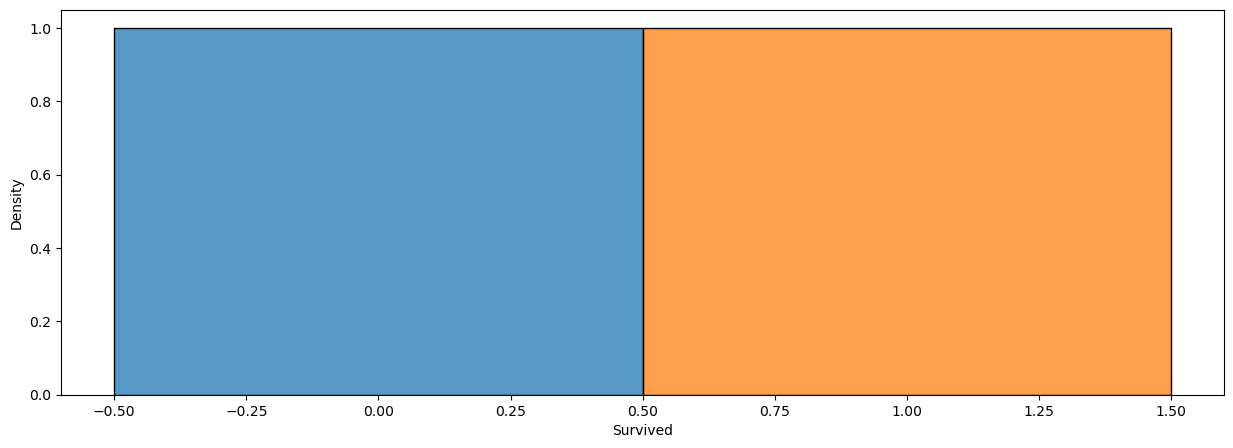

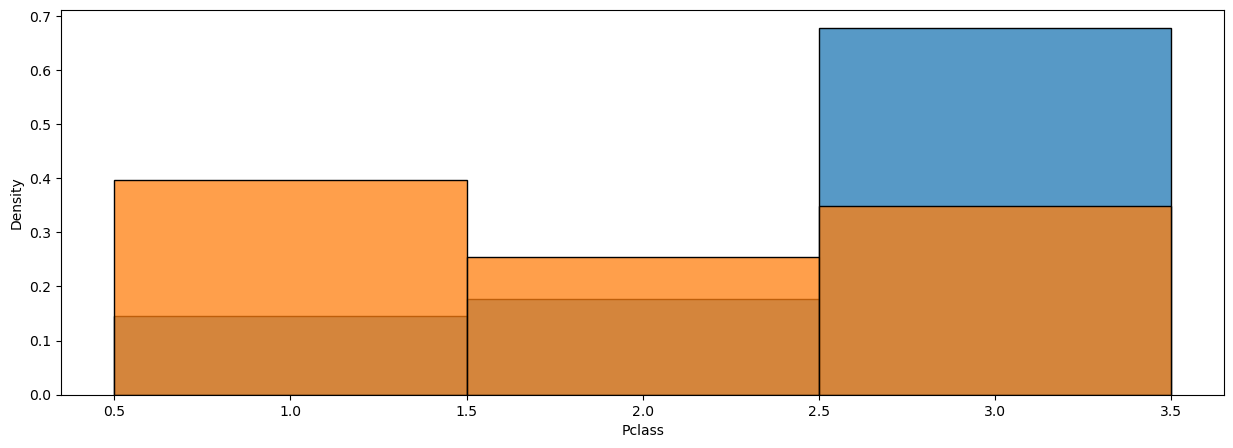

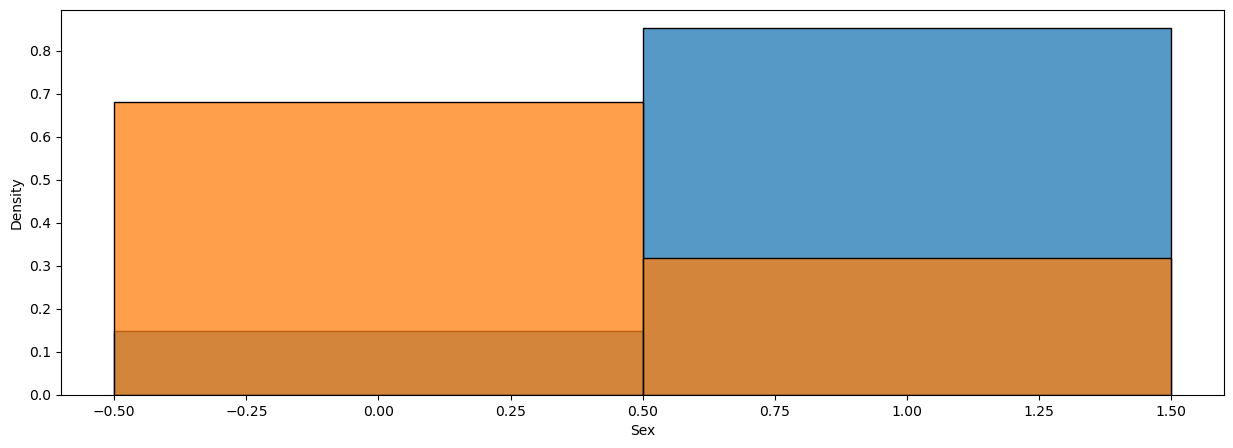

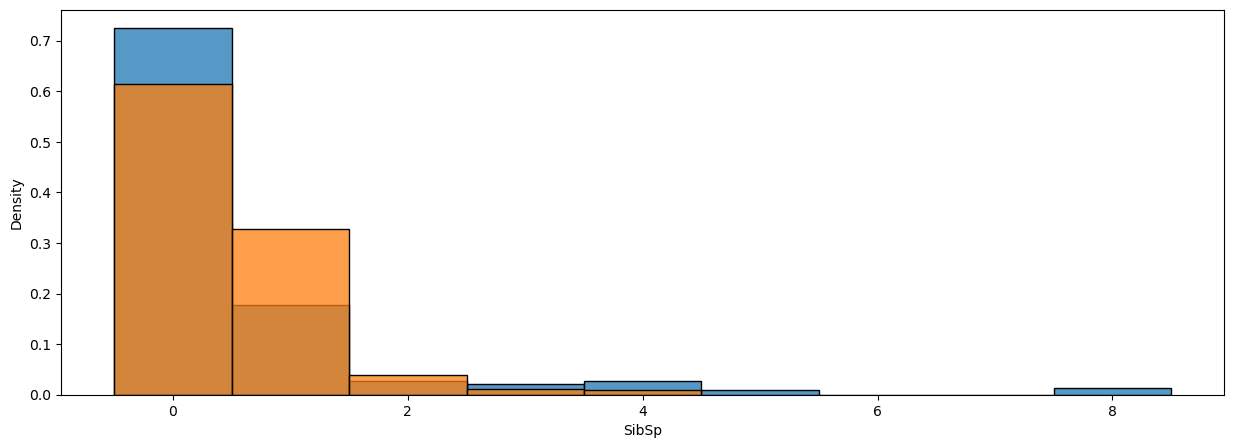

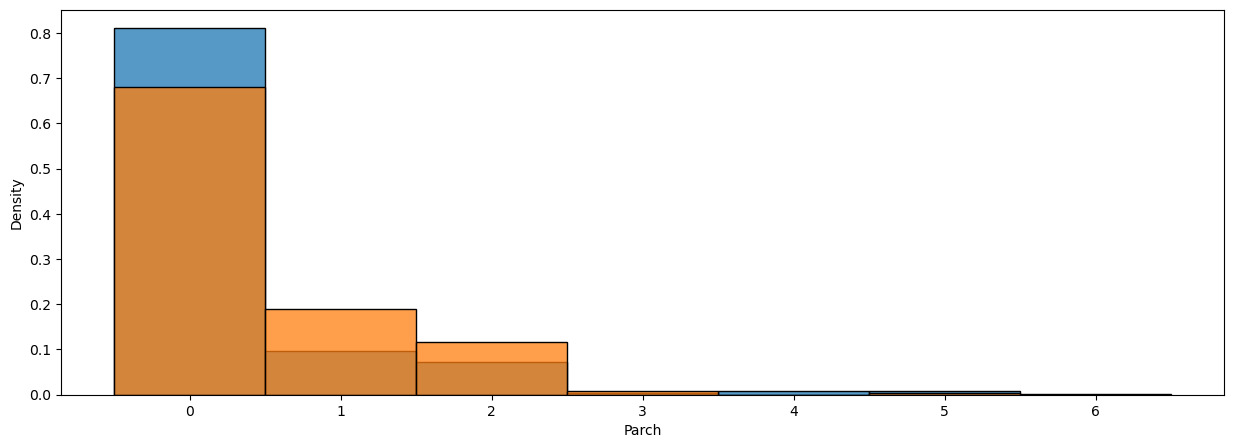

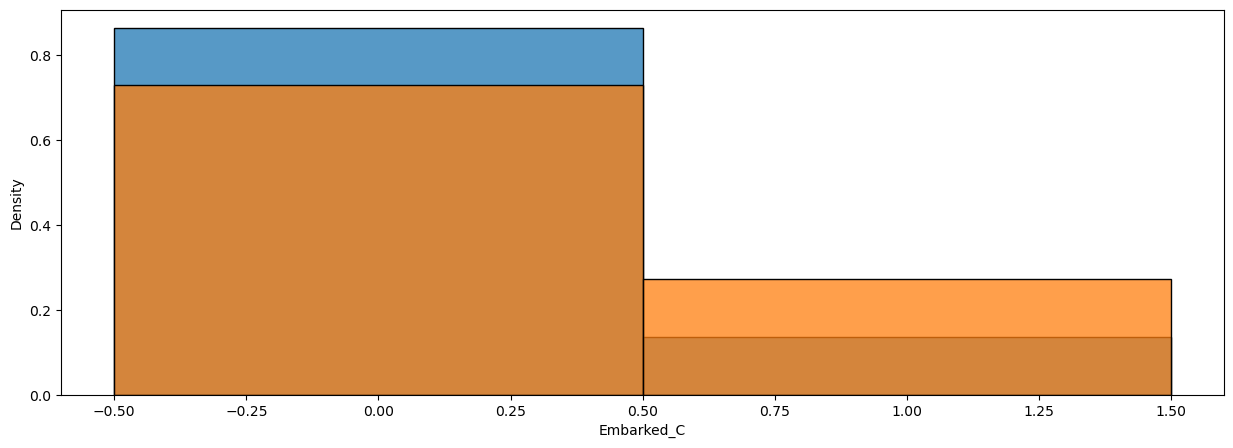

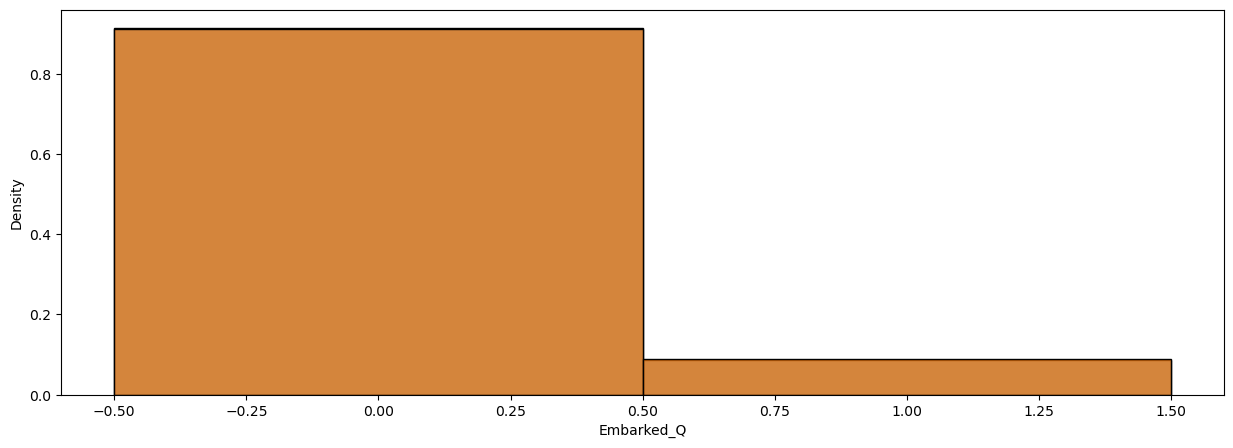

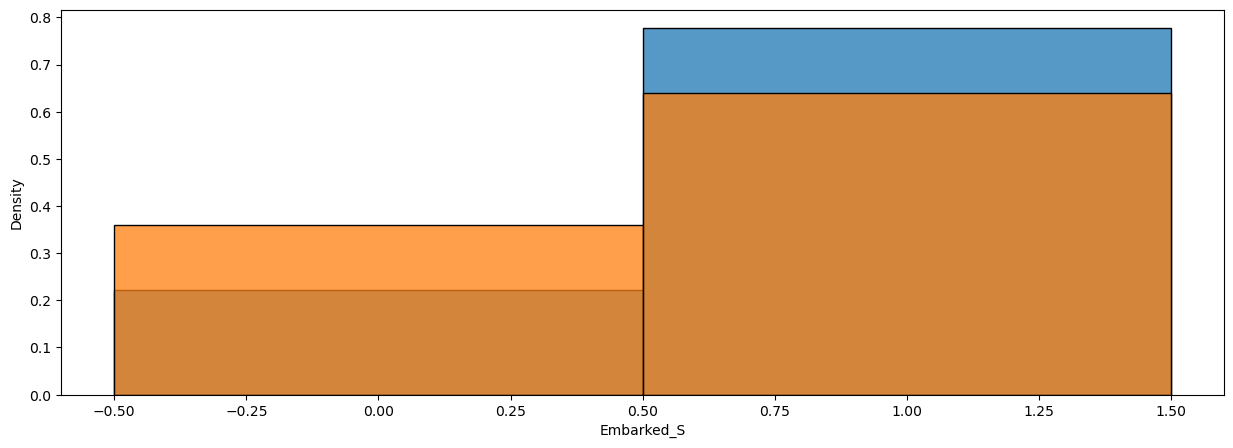

In [23]:
for i, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    sns.histplot(train_df.loc[train_df['Survived'] == 0, column], stat='density')
    sns.histplot(train_df.loc[train_df['Survived'] == 1, column], stat='density')
    plt.show()

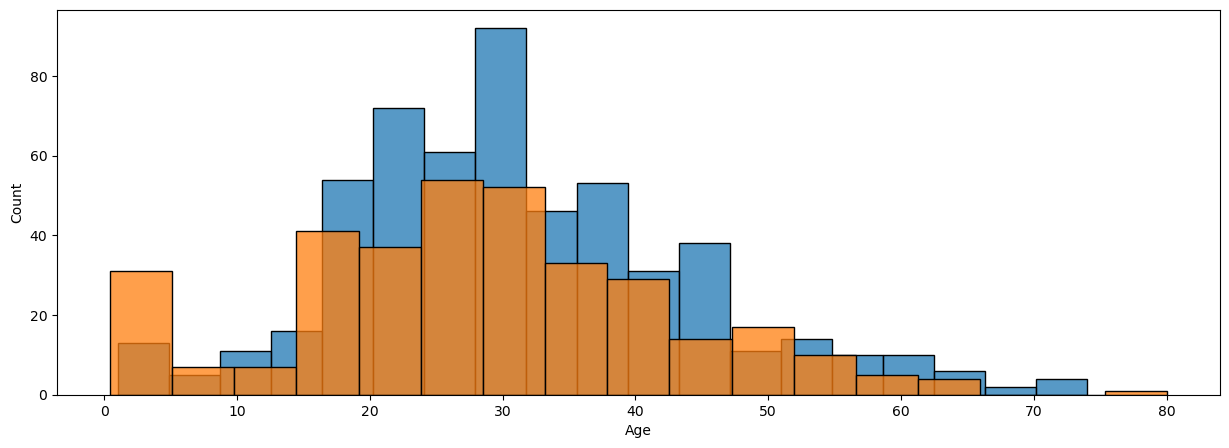

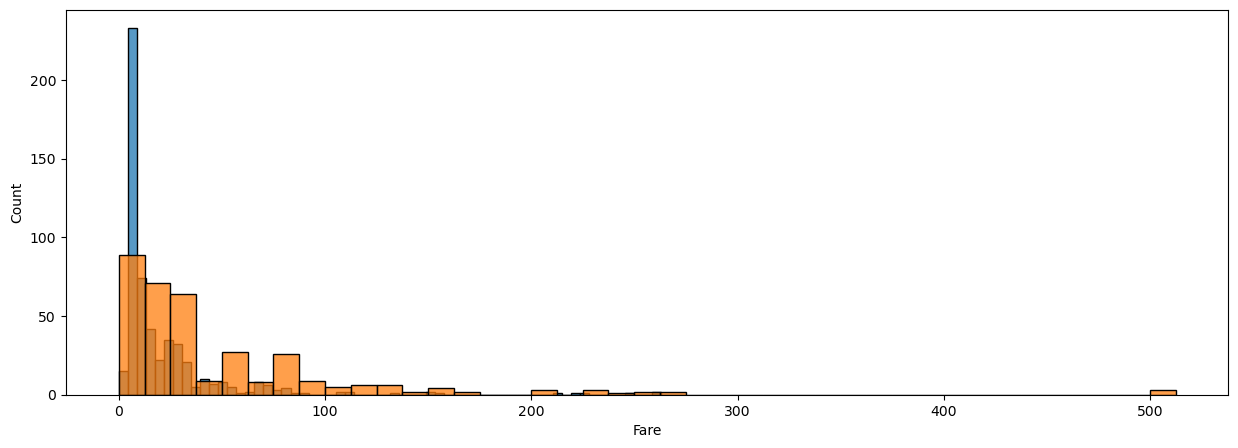

In [24]:
for i, column in enumerate(numerical_features):
    plt.figure(figsize=(15, 5))
    sns.histplot(train_df.loc[train_df['Survived'] == 0, column])
    sns.histplot(train_df.loc[train_df['Survived'] == 1, column])
    plt.show()

## Outliers

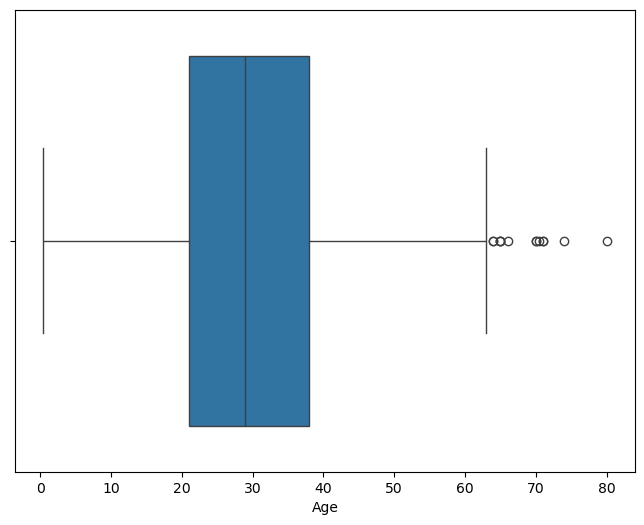

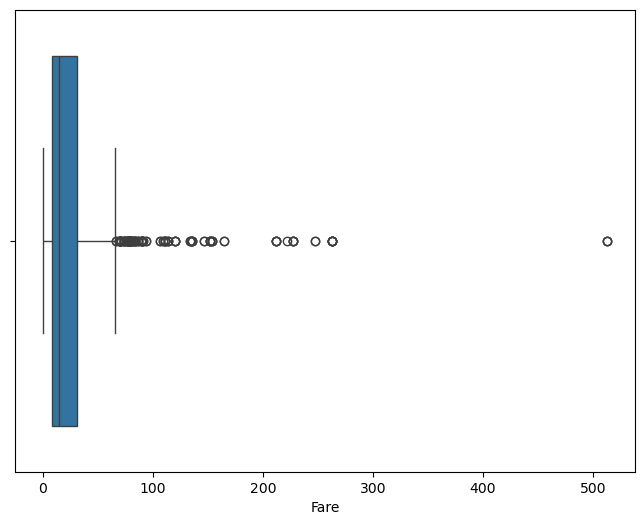

In [25]:
for i, col in enumerate(numerical_features):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_df[col])
    plt.xlabel(col)
    plt.show()

In [26]:
print((train_df['Fare'].value_counts()).sort_index(ascending=False))

Fare
512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
221.7792     1
211.5000     1
211.3375     3
164.8667     2
153.4625     3
151.5500     4
146.5208     2
135.6333     3
134.5000     2
133.6500     2
120.0000     4
113.2750     3
110.8833     4
108.9000     2
106.4250     2
93.5000      2
91.0792      2
90.0000      4
89.1042      2
86.5000      3
83.4750      2
83.1583      3
82.1708      2
81.8583      1
80.0000      2
79.6500      3
79.2000      4
78.8500      2
78.2667      2
77.9583      3
77.2875      2
76.7292      3
76.2917      1
75.2500      1
73.5000      5
71.2833      1
71.0000      2
69.5500      7
69.3000      2
66.6000      2
65.0000      2
63.3583      1
61.9792      1
61.3792      1
61.1750      1
59.4000      1
57.9792      2
57.0000      2
56.9292      2
56.4958      7
55.9000      2
55.4417      1
55.0000      2
53.1000      5
52.5542      3
52.0000      7
51.8625      2
51.4792      1
50.4958      1
50.0000      1
49.5042      2
49.50

## Correlation Matrix

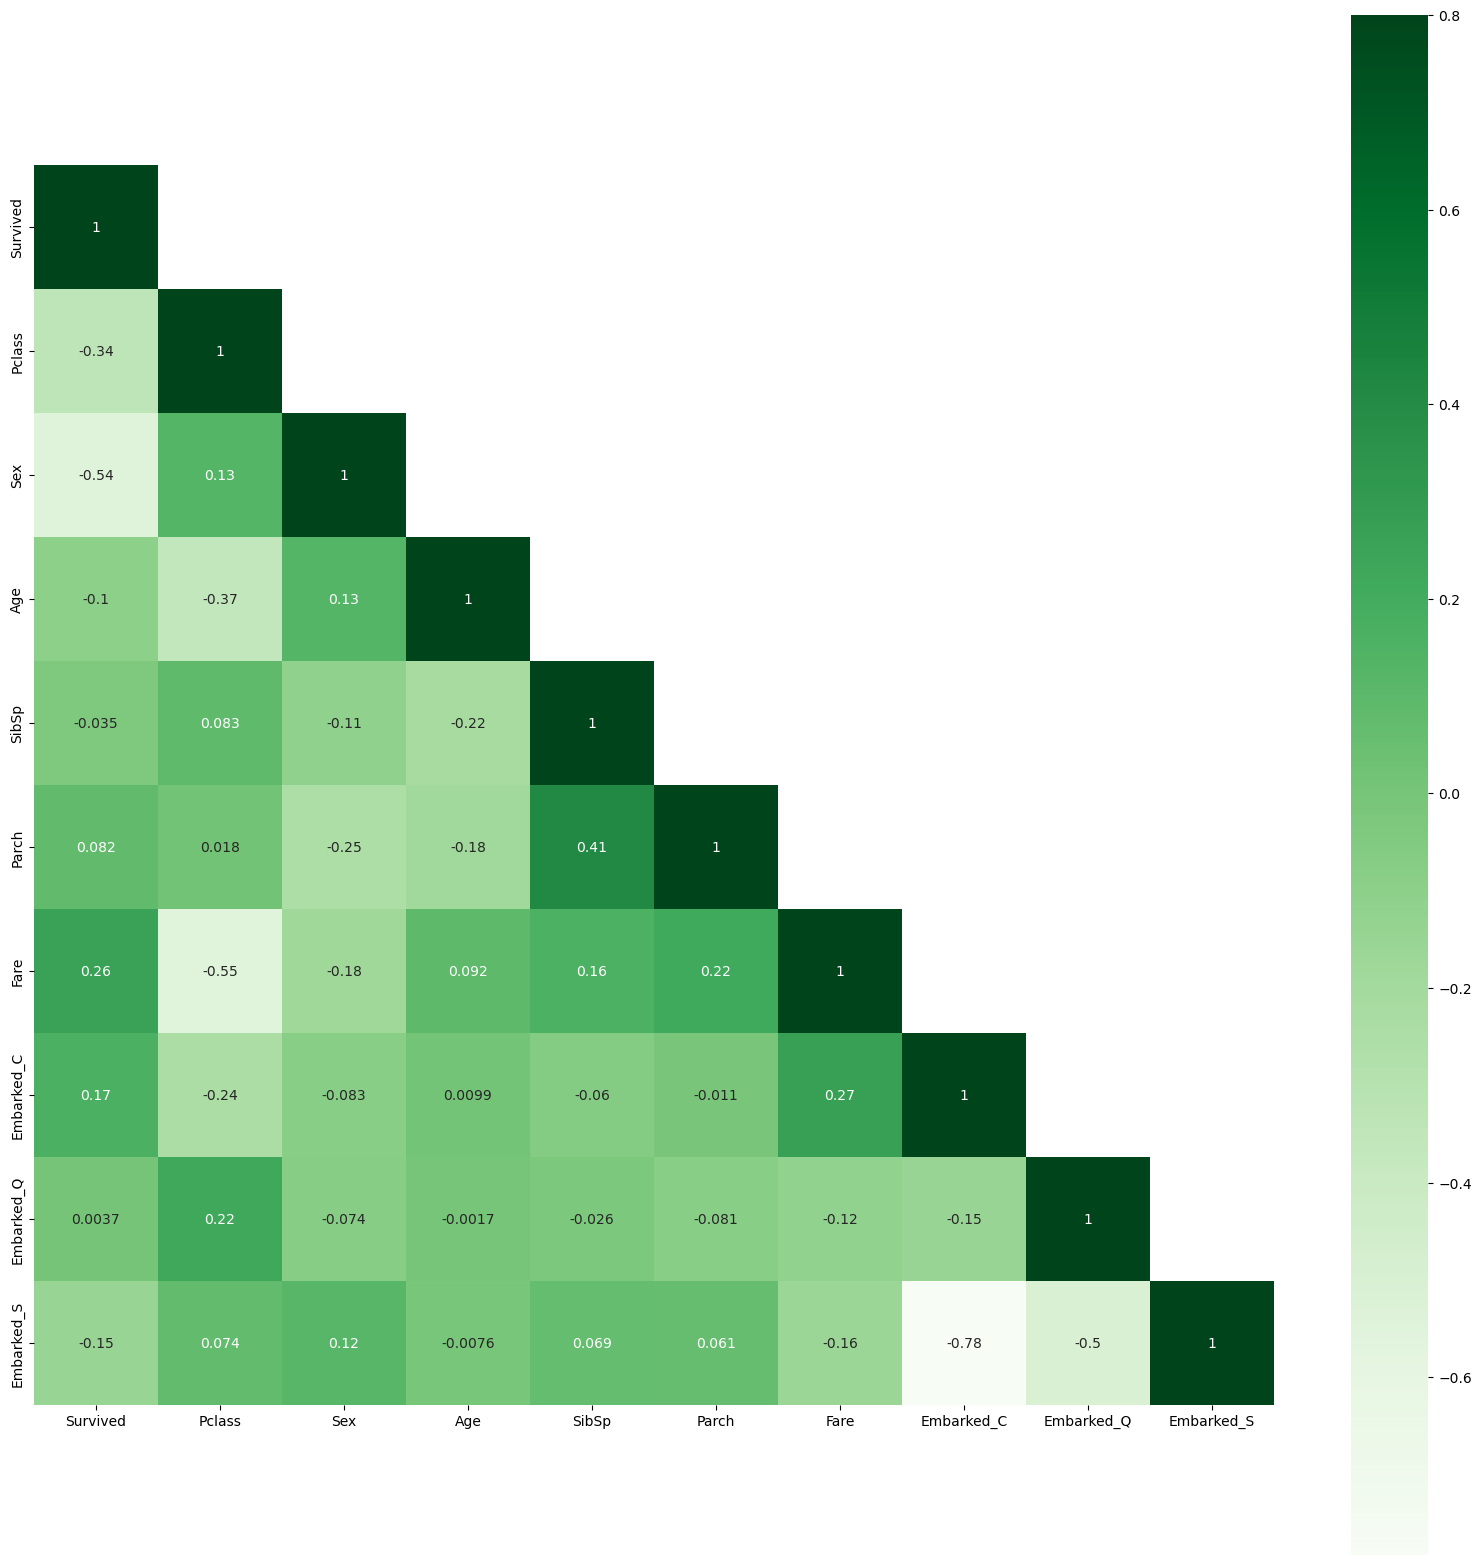

In [27]:
correlation_matrix = train_df.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", mask=mask, vmax=.8, square=True)
plt.show()

# EDA for test data

## Number of values and columns

In [28]:
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Columns to remove

In [29]:
id_column = test_df['PassengerId']

In [30]:
columns_to_remove = ['PassengerId', 'Name', 'Ticket']
test_df.drop(columns=columns_to_remove, axis=1, inplace=True)

In [31]:
print(test_df.shape)

(418, 8)


## Missing Data

In [32]:
missing_data_cnt = test_df.isnull().sum()
print(missing_data_cnt)

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [33]:
missing_data_prc = test_df.isnull().sum() / len(test_df) * 100
print(missing_data_prc)

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64


In [34]:
print(test_df[test_df['Fare'].isna()])

     Pclass   Sex   Age  SibSp  Parch  Fare Cabin Embarked
152       3  male  60.5      0      0   NaN   NaN        S


In [35]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

## Columns to remove

In [36]:
test_df.drop(columns='Cabin', axis=1, inplace=True)

In [37]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### One-Hot Encoding

In [38]:
test_df = pd.get_dummies(test_df, columns=['Embarked'], dtype=int)

### Label Encoding 

In [39]:
test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])

In [40]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


### Fill in 'Age'

In [41]:
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

In [42]:
missing_data_cnt = test_df.isnull().sum()
print(missing_data_cnt)

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


## Variables Types

In [43]:
test_df.dtypes

Pclass        float64
Sex           float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [44]:
columns_to_convert = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
test_df[columns_to_convert] = test_df[columns_to_convert].astype('category')

In [45]:
test_df.dtypes

Pclass        category
Sex           category
Age            float64
SibSp         category
Parch         category
Fare           float64
Embarked_C    category
Embarked_Q    category
Embarked_S    category
dtype: object

## Distribution

In [46]:
test_df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.0,418.0,418.000000,418.0,418.0,418.000000,418.0,418.0,418.0
unique,3.0,2.0,NaN,7.0,8.0,NaN,2.0,2.0,2.0
top,3.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0
freq,218.0,266.0,NaN,283.0,324.0,NaN,316.0,372.0,270.0
mean,NaN,NaN,29.643074,NaN,NaN,35.627188,NaN,NaN,NaN
std,NaN,NaN,12.947979,NaN,NaN,55.840500,NaN,NaN,NaN
min,NaN,NaN,0.170000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,22.000000,NaN,NaN,7.895800,NaN,NaN,NaN
50%,NaN,NaN,26.666667,NaN,NaN,14.454200,NaN,NaN,NaN
75%,NaN,NaN,36.000000,NaN,NaN,31.500000,NaN,NaN,NaN


## Histogram 

In [47]:
categorical_features = test_df.select_dtypes(include='category')
numerical_features = test_df.select_dtypes(include=['int', 'float'])

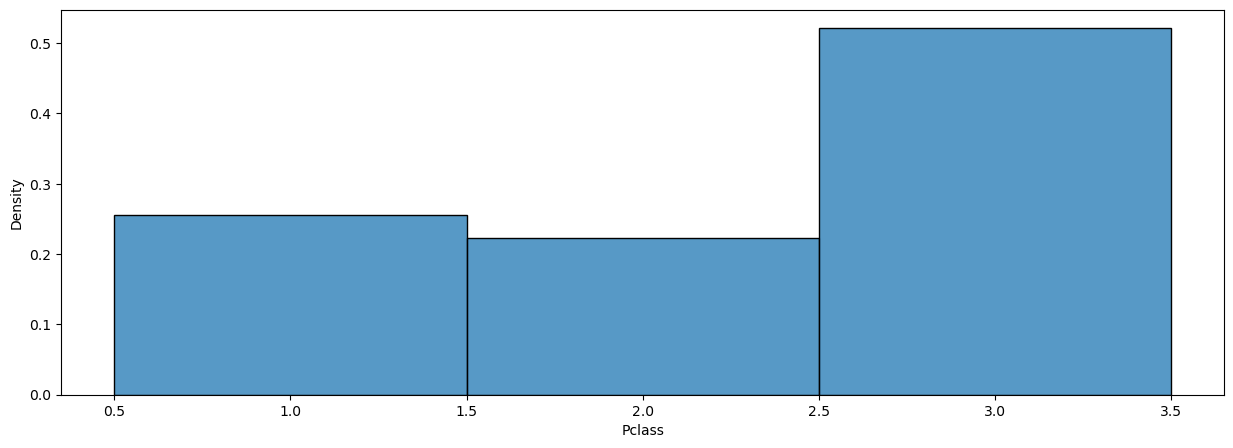

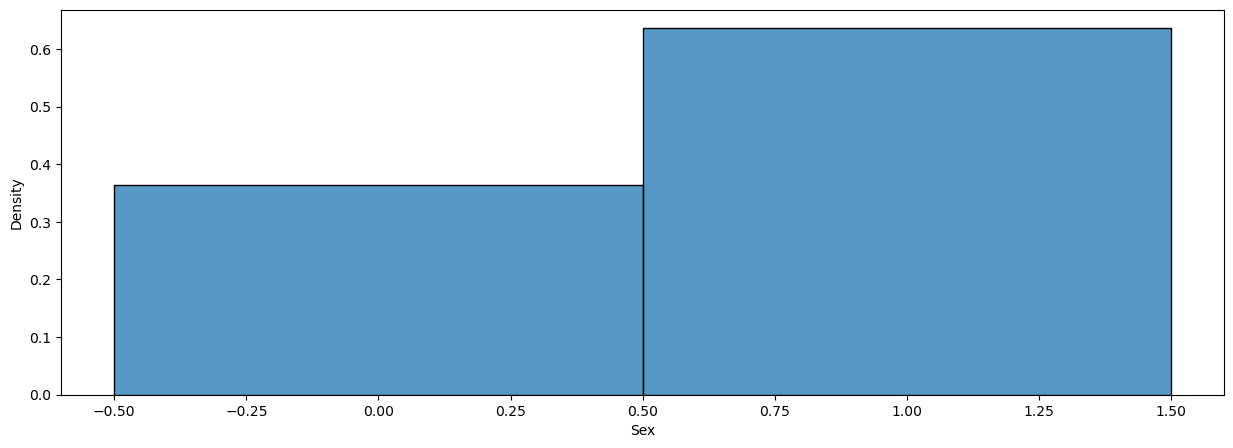

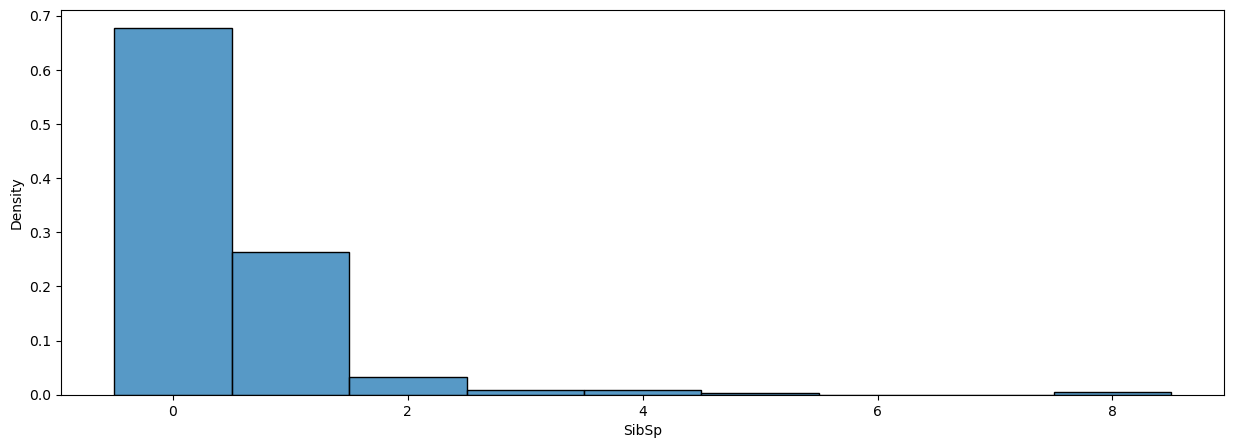

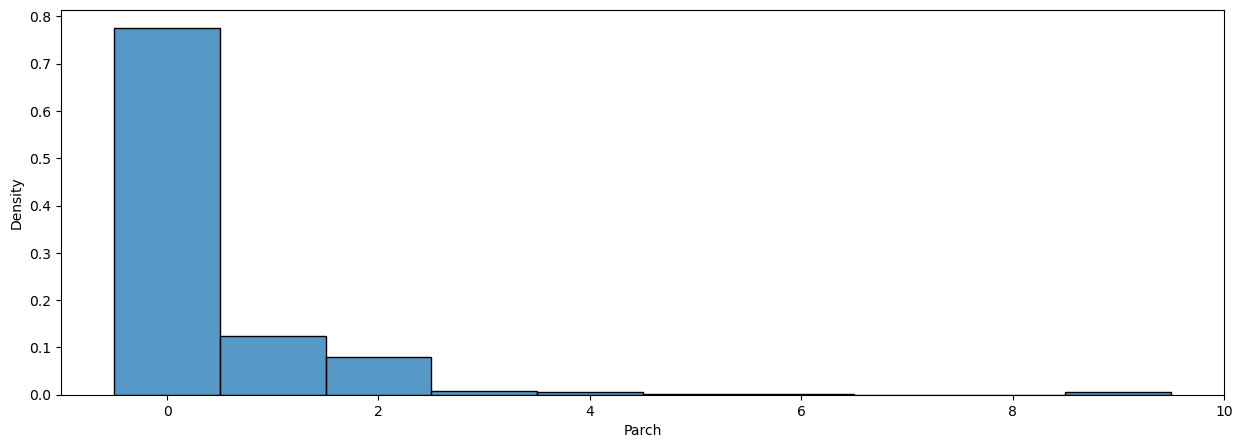

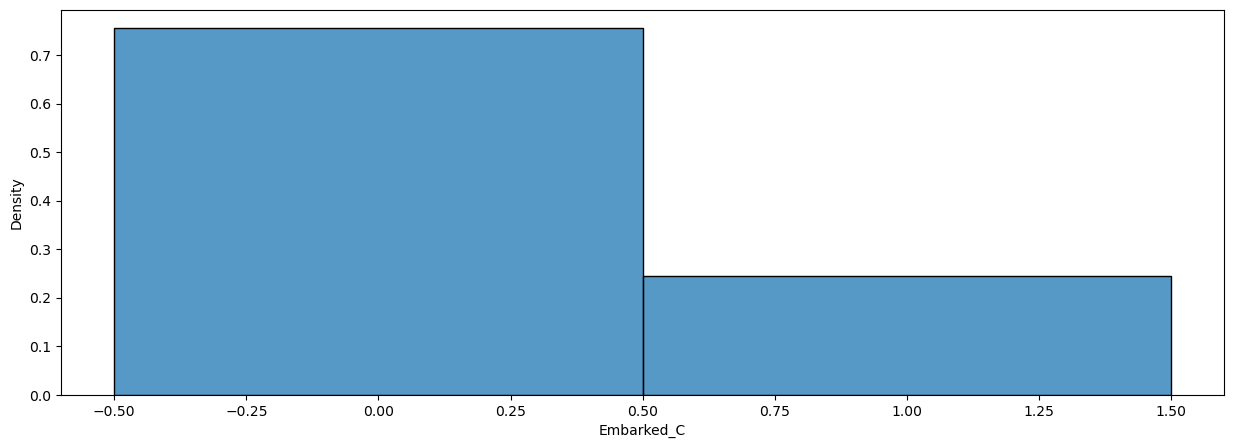

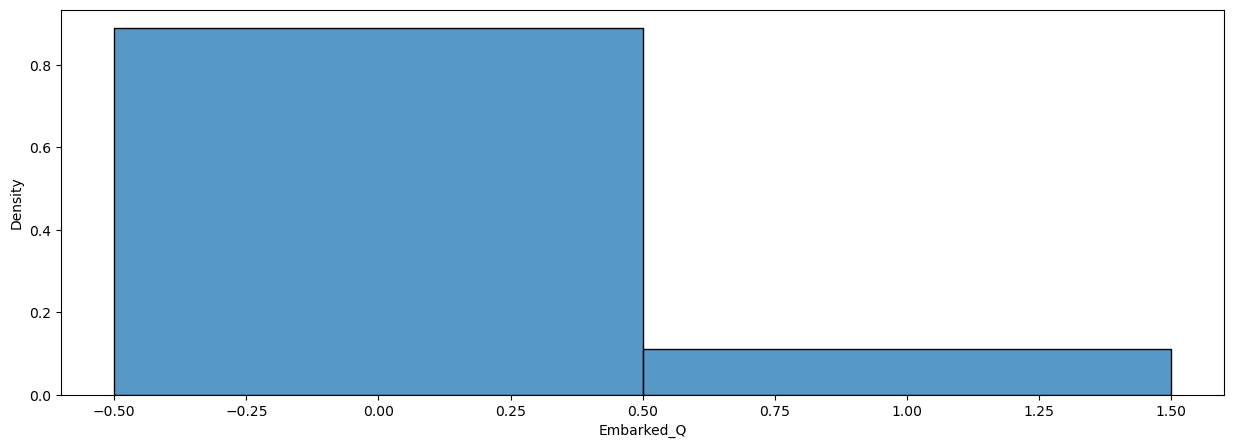

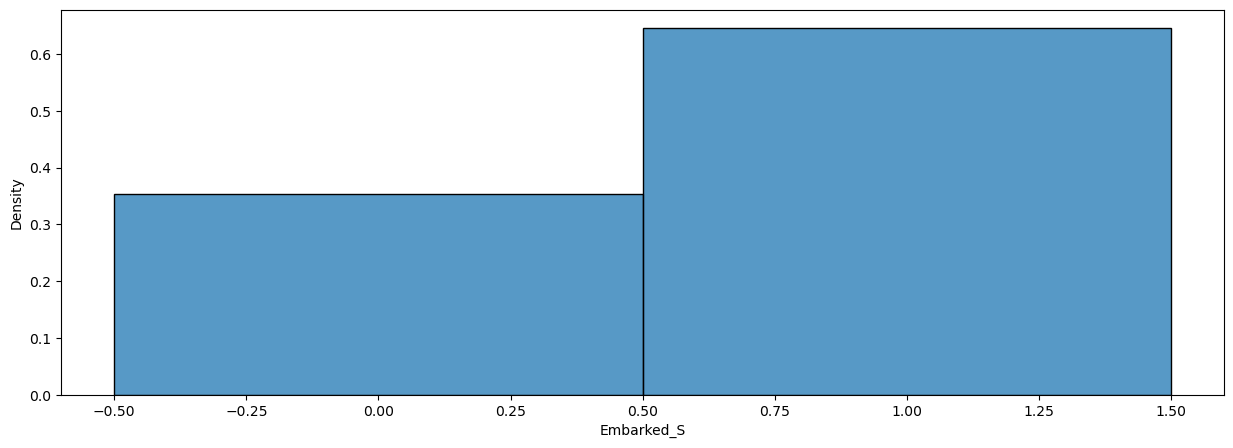

In [48]:
for i, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    sns.histplot(test_df[column], stat='density')
    plt.show()

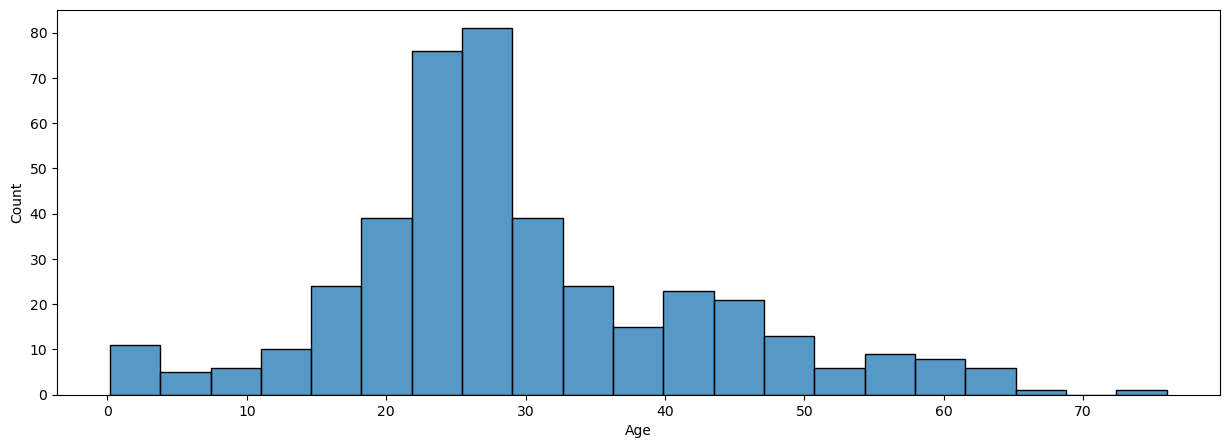

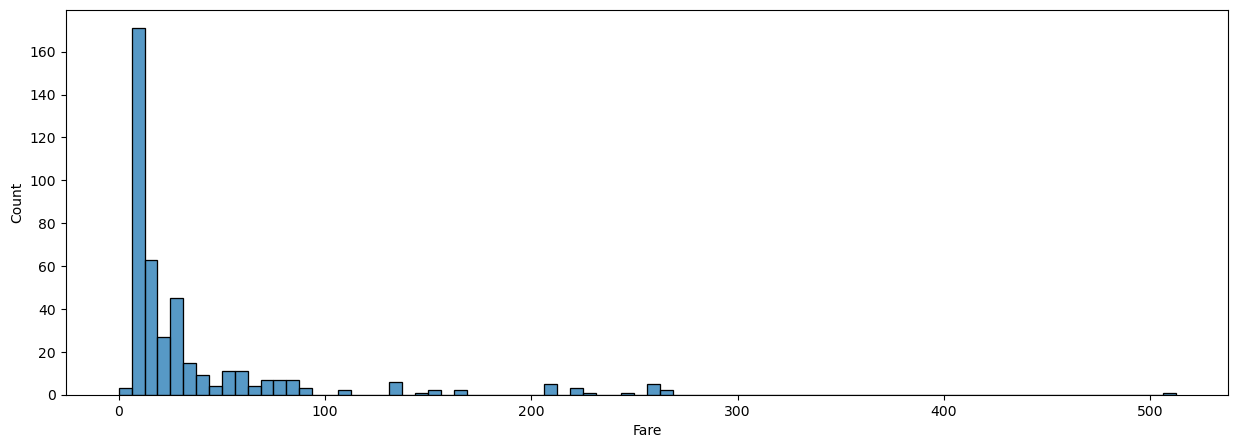

In [49]:
for i, column in enumerate(numerical_features):
    plt.figure(figsize=(15, 5))
    sns.histplot(test_df[column])
    plt.show()

## Outliers

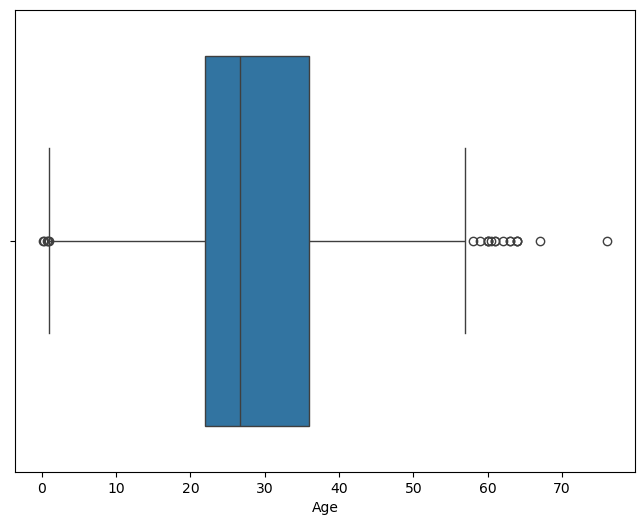

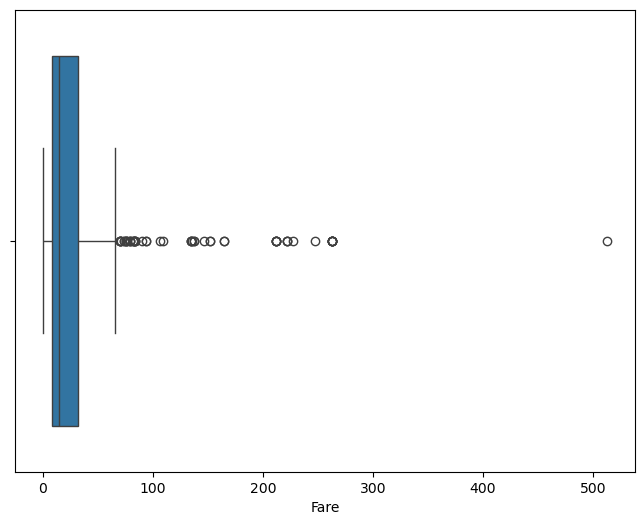

In [50]:
for i, col in enumerate(numerical_features):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=test_df[col])
    plt.xlabel(col)
    plt.show()

In [51]:
print((test_df['Fare'].value_counts()).sort_index(ascending=False))

Fare
512.329200     1
263.000000     2
262.375000     5
247.520800     1
227.525000     1
221.779200     3
211.500000     4
211.337500     1
164.866700     2
151.550000     2
146.520800     1
136.779200     2
135.633300     1
134.500000     3
108.900000     1
106.425000     1
93.500000      2
90.000000      1
83.158300      3
82.266700      2
81.858300      2
79.200000      2
78.850000      1
76.291700      1
75.250000      1
75.241700      2
73.500000      2
71.283300      1
69.550000      4
65.000000      3
63.358300      1
61.979200      1
61.379200      1
61.175000      1
60.000000      2
59.400000      3
57.750000      2
56.495800      1
55.441700      3
53.100000      1
52.554200      1
52.000000      1
51.862500      2
51.479200      1
50.495800      1
50.000000      1
47.100000      1
46.900000      2
45.500000      1
42.500000      1
42.400000      1
41.579200      1
39.687500      1
39.600000      1
39.400000      1
39.000000      3
37.004200      1
36.750000      2
35.627188

## Correlation Matrix

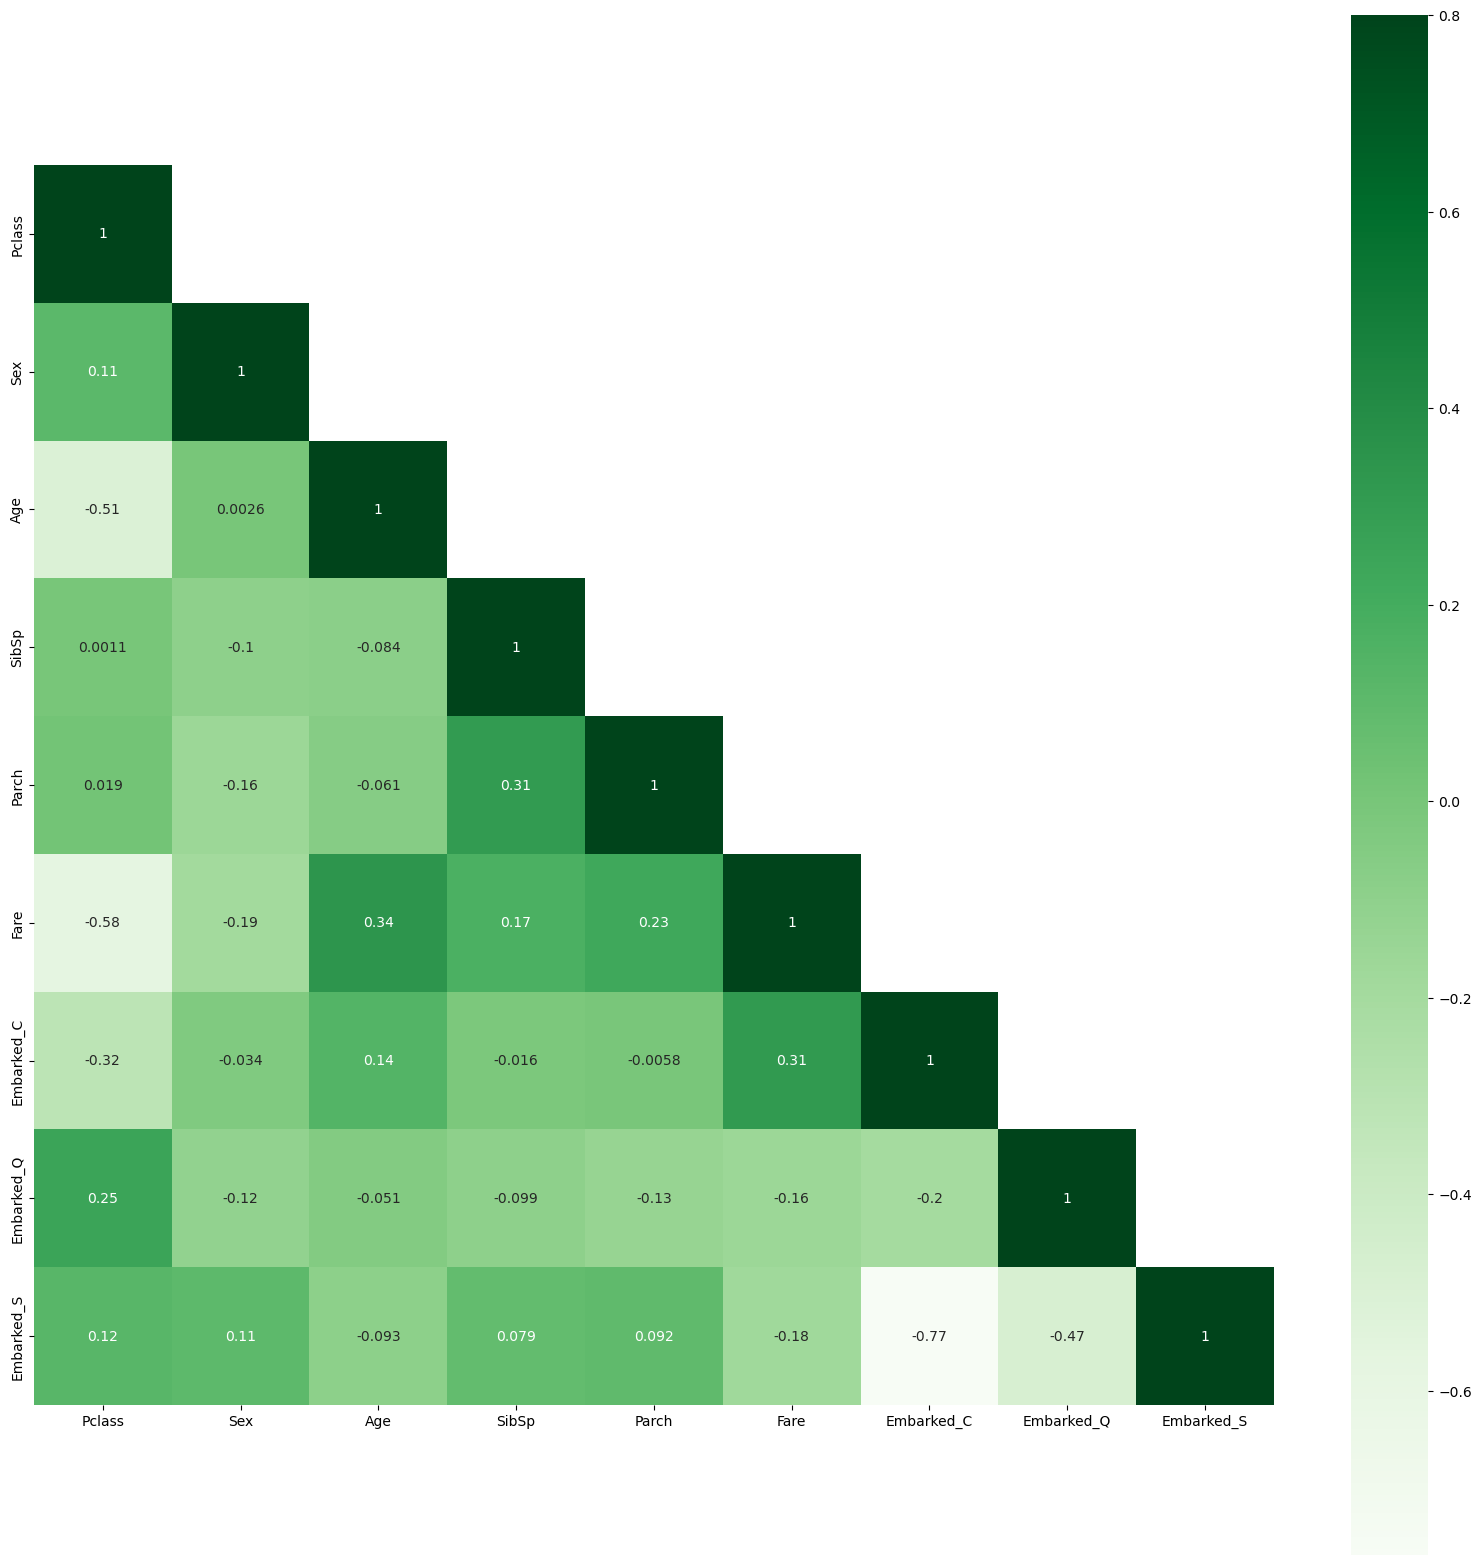

In [52]:
correlation_matrix = test_df.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", mask=mask, vmax=.8, square=True)
plt.show()

# Clustering

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## K-means Clustering

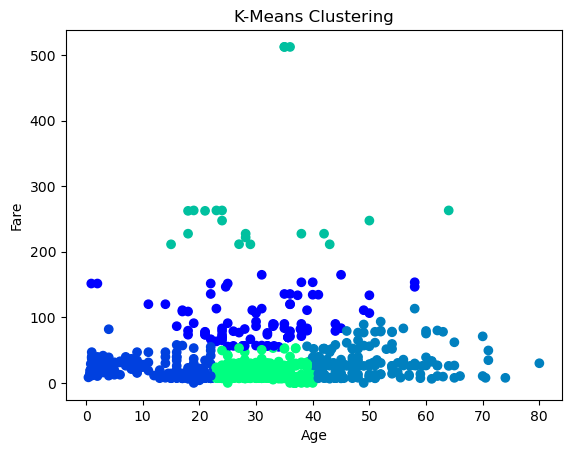

In [100]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df[['Age', 'Fare']])
scaled_df = pd.DataFrame(scaled_features)

kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_df)

train_df['Cluster'] = kmeans.labels_

plt.scatter(train_df['Age'], train_df['Fare'], c=train_df['Cluster'], cmap='winter')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K-Means Clustering')
plt.show()

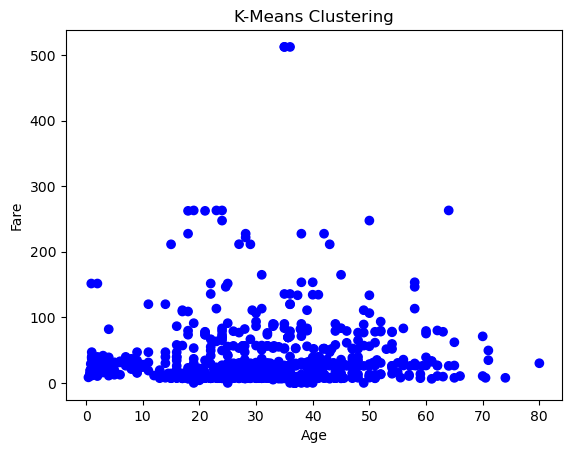

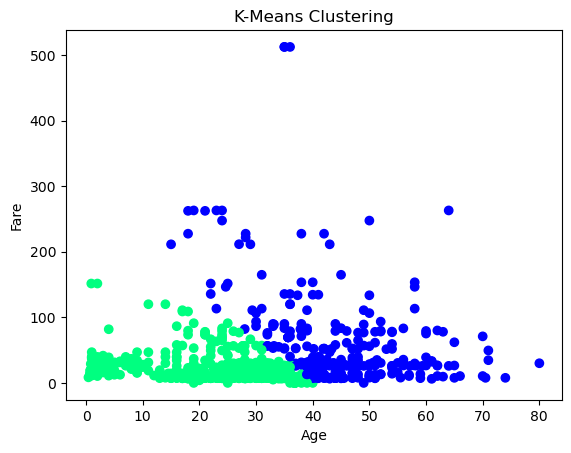

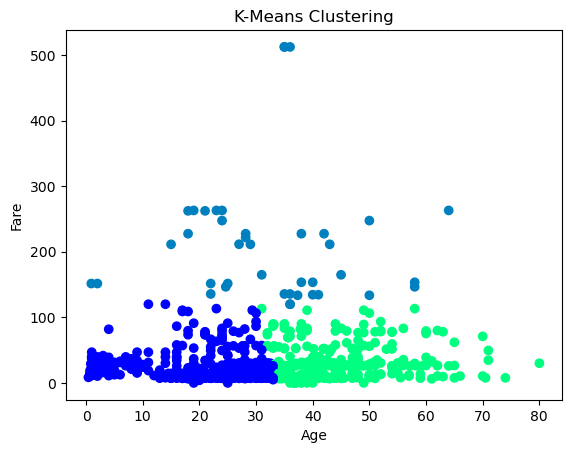

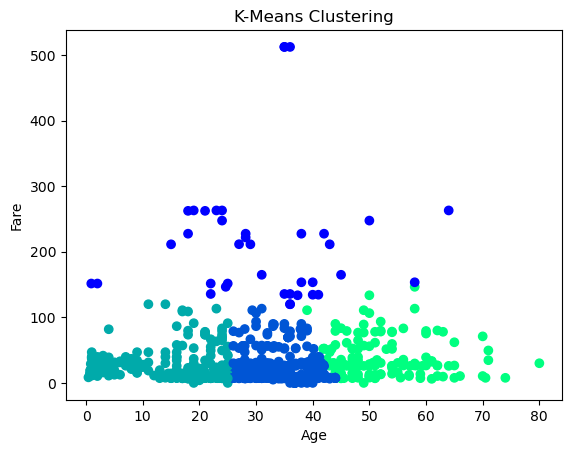

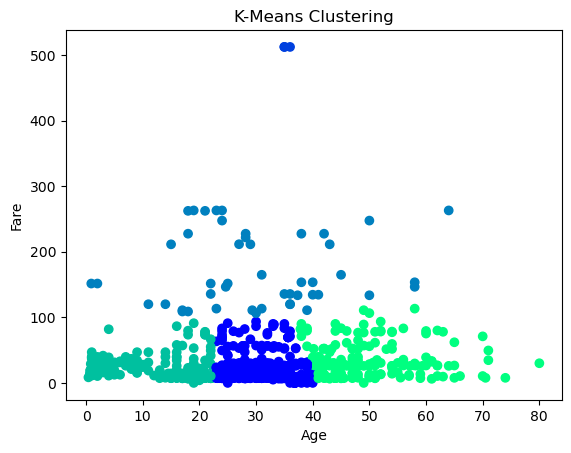

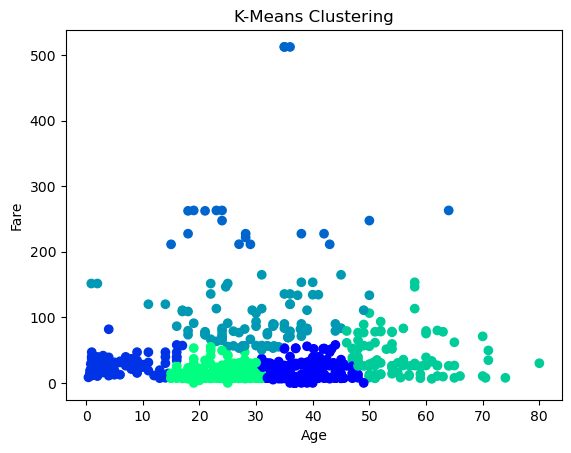

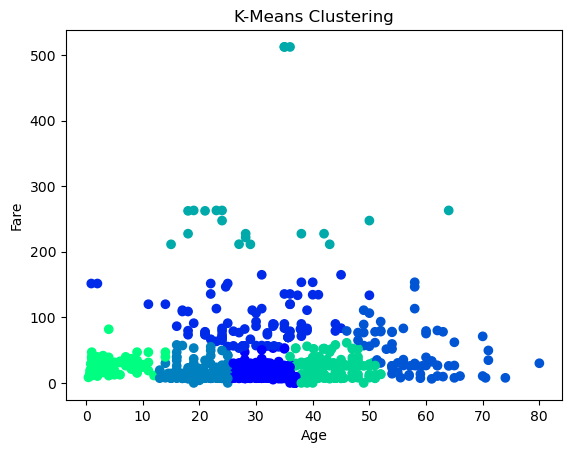

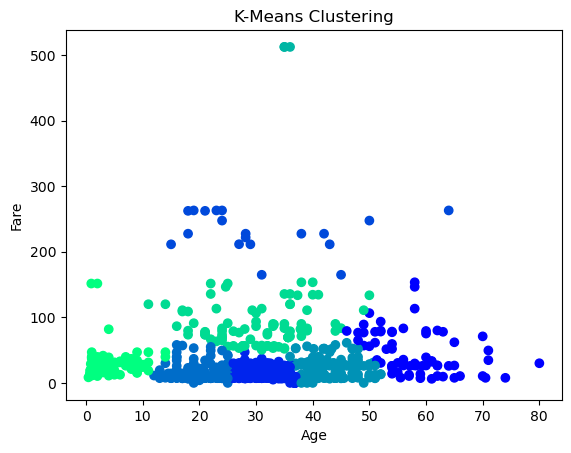

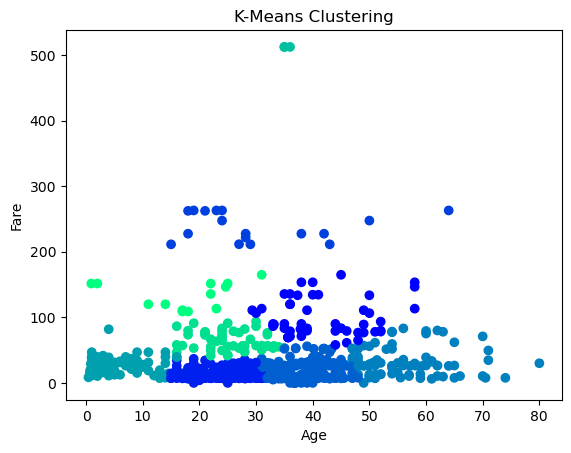

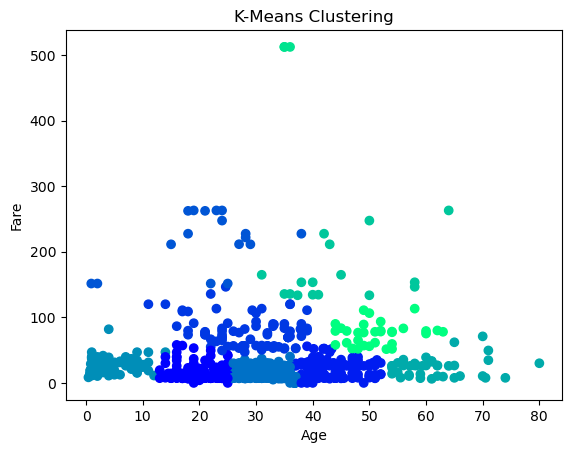

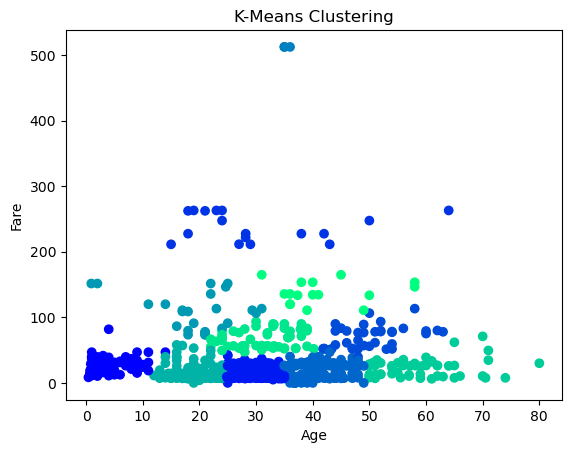

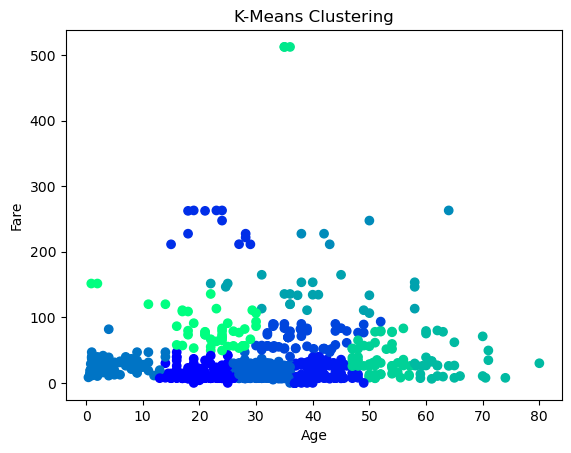

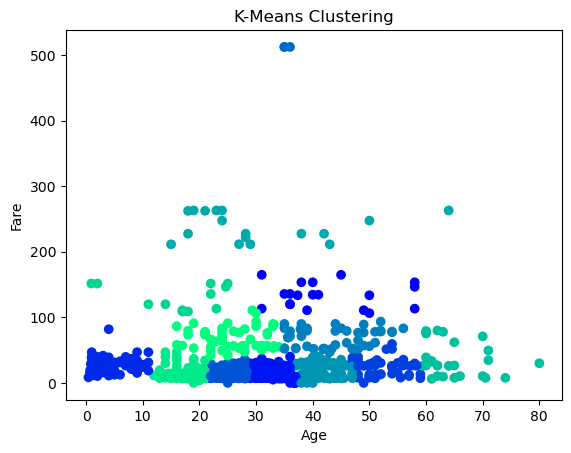

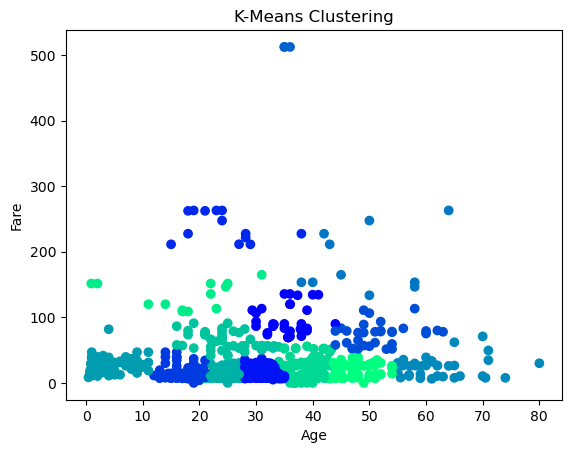

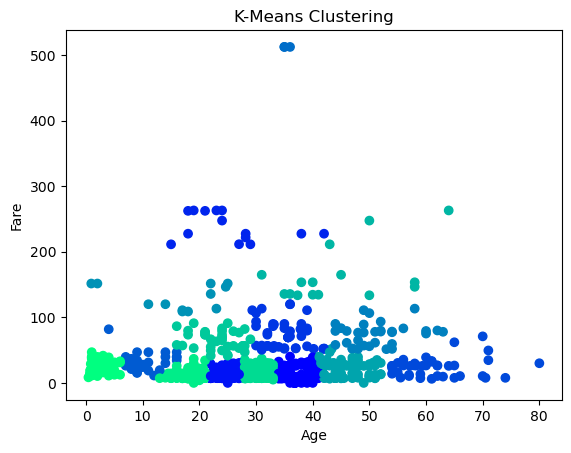

In [104]:
for n in range(1, 16):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(train_df[['Age', 'Fare']])
    scaled_df = pd.DataFrame(scaled_features)

    kmeans = KMeans(n_clusters = n)
    kmeans.fit(scaled_df)

    train_df['Cluster'] = kmeans.labels_

    plt.scatter(train_df['Age'], train_df['Fare'], c=train_df['Cluster'], cmap='winter')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('K-Means Clustering')
    plt.show()

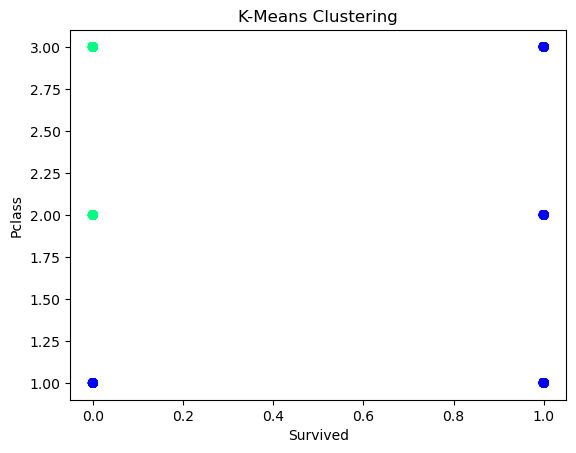

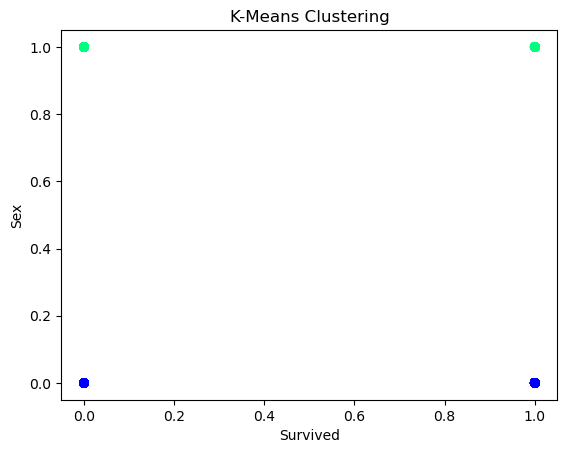

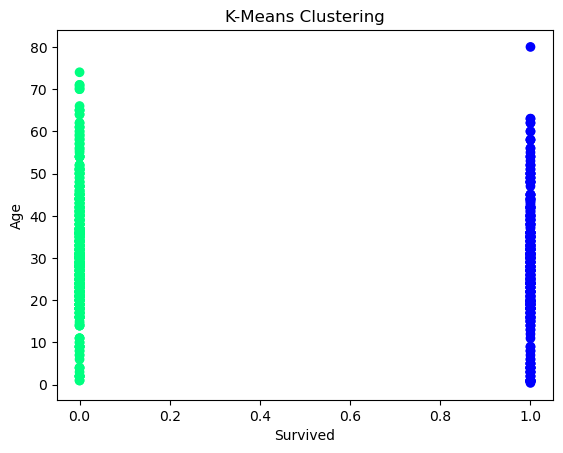

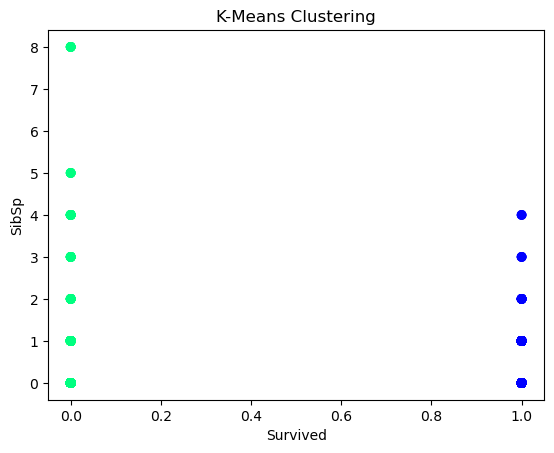

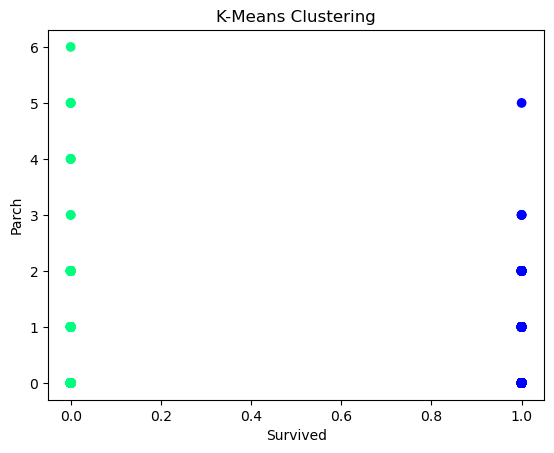

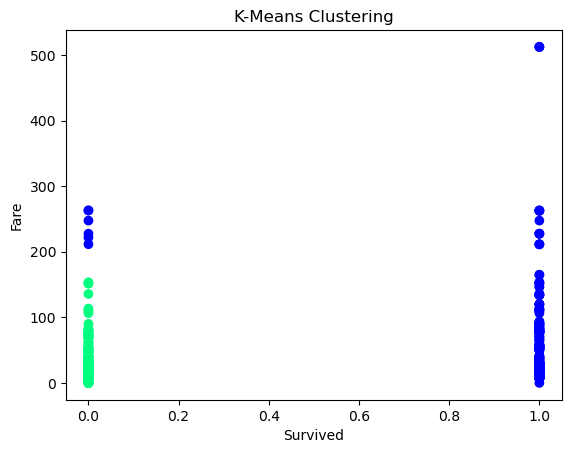

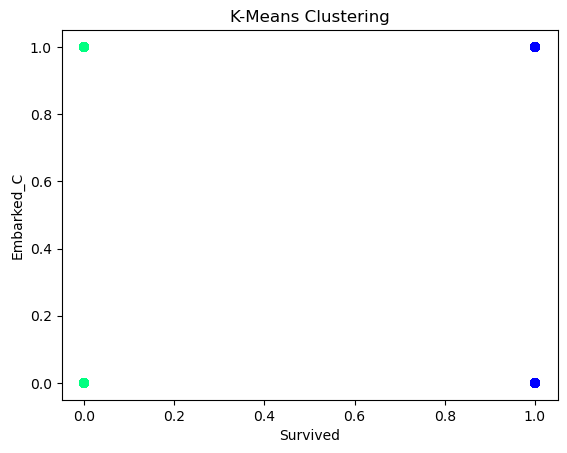

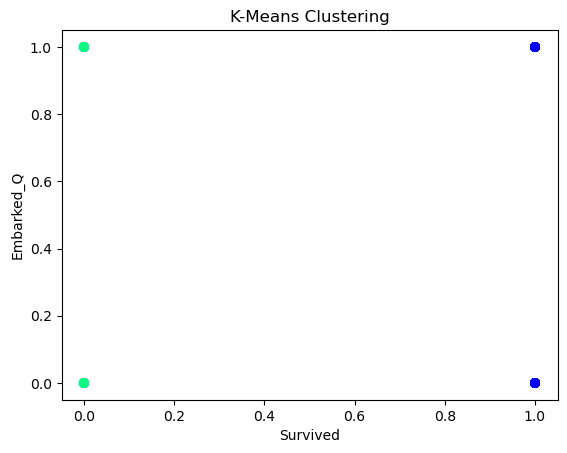

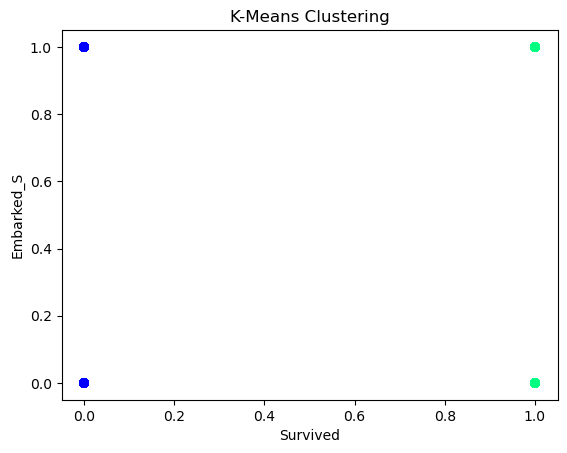

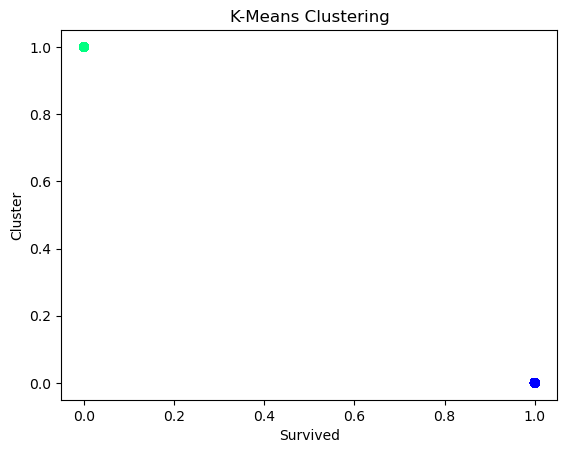

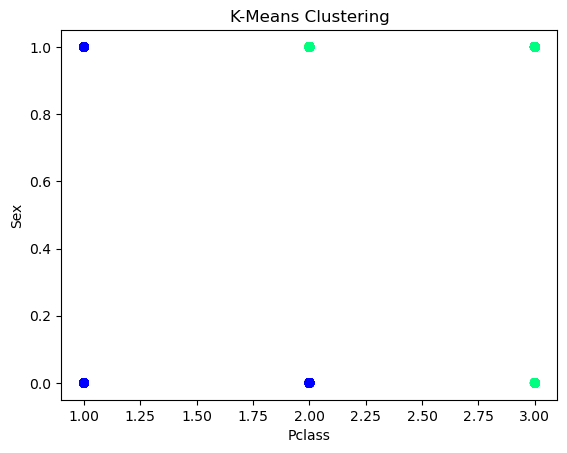

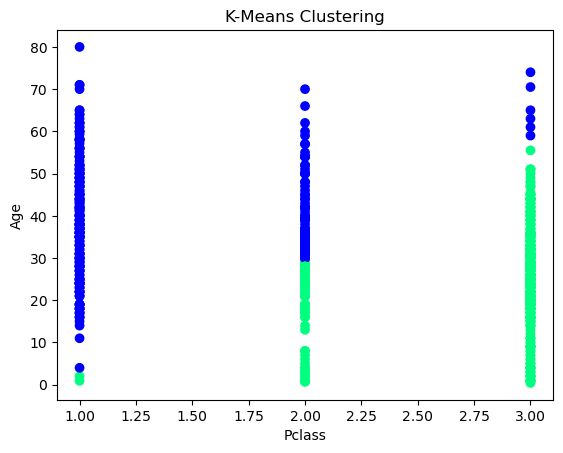

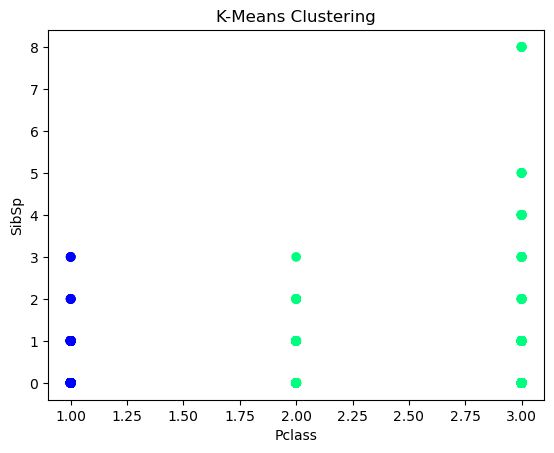

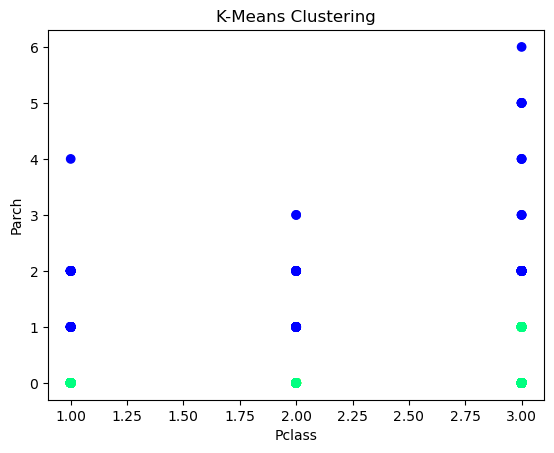

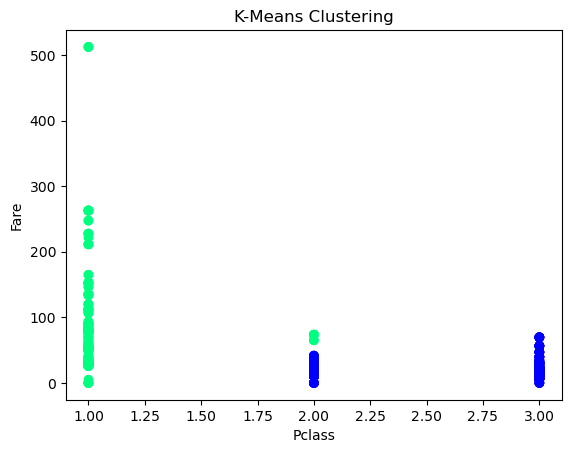

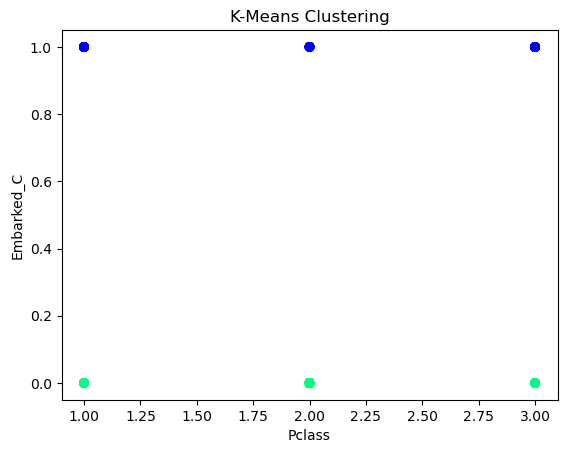

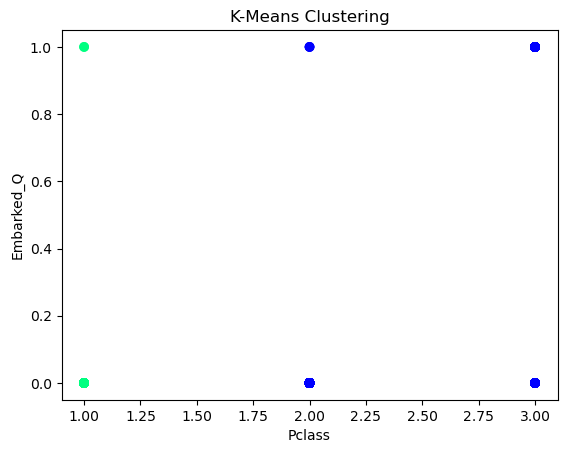

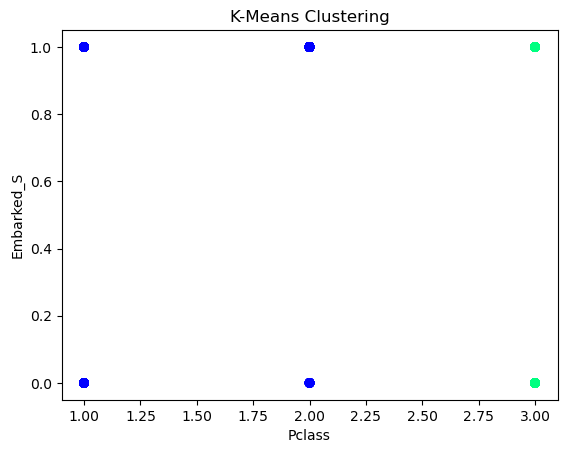

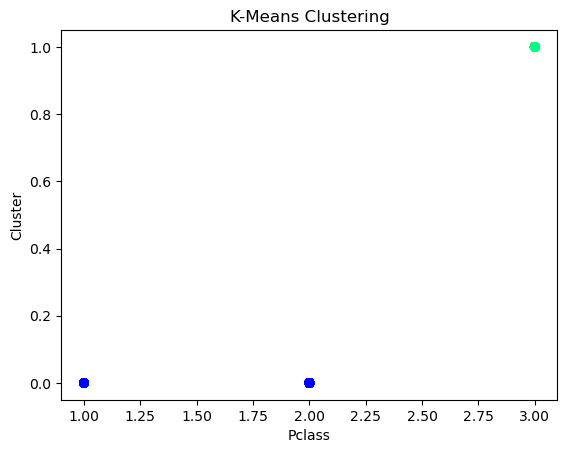

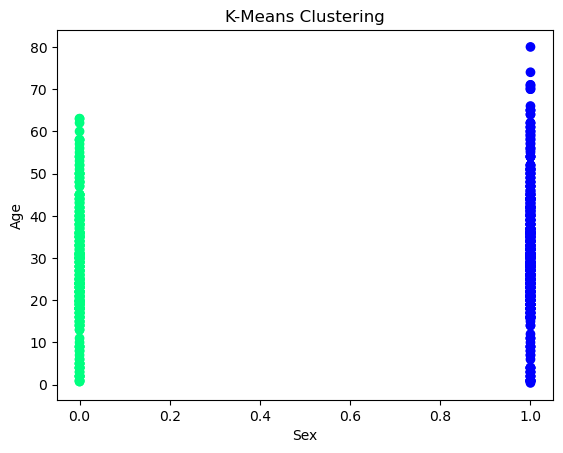

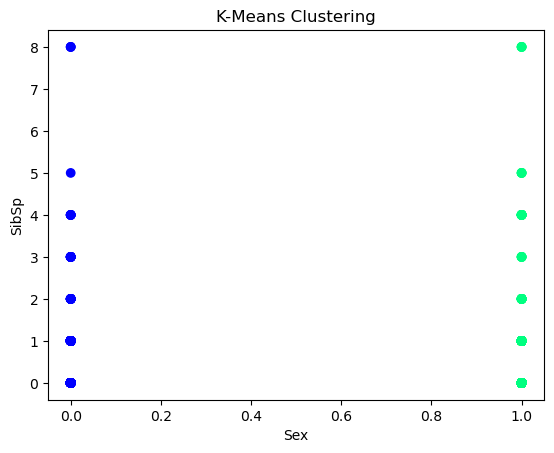

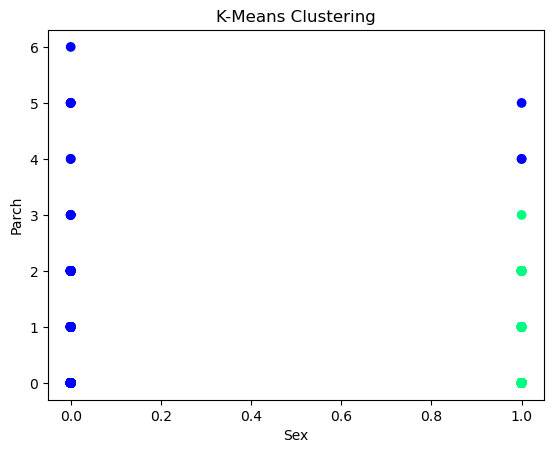

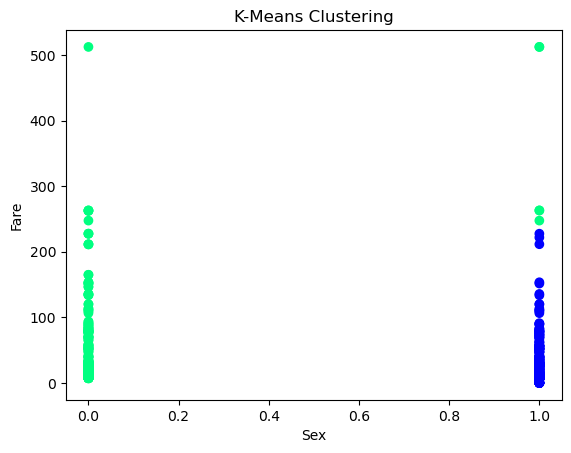

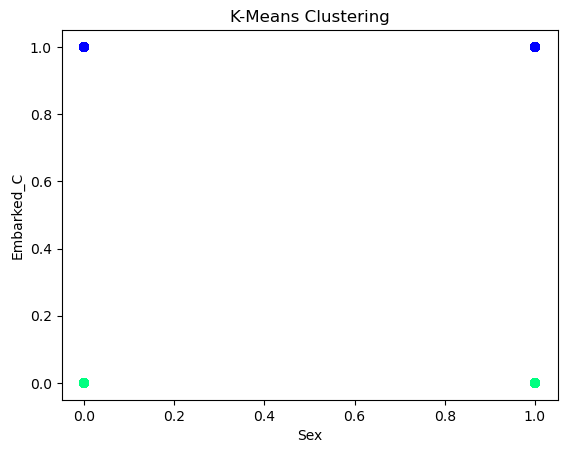

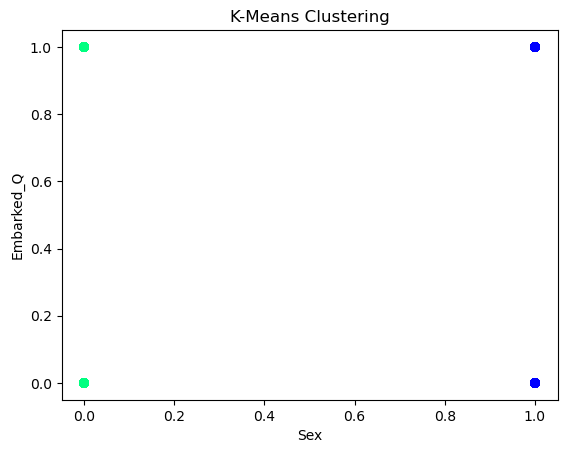

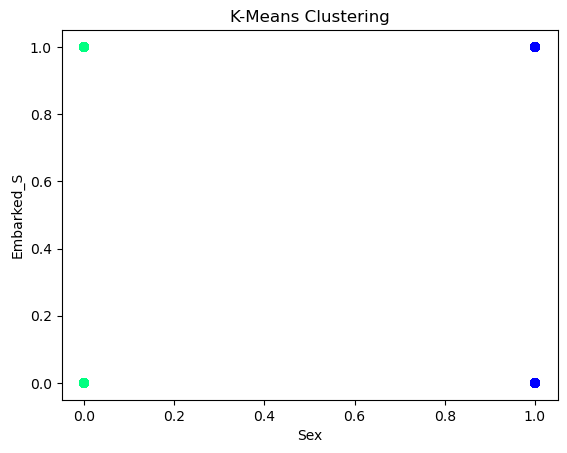

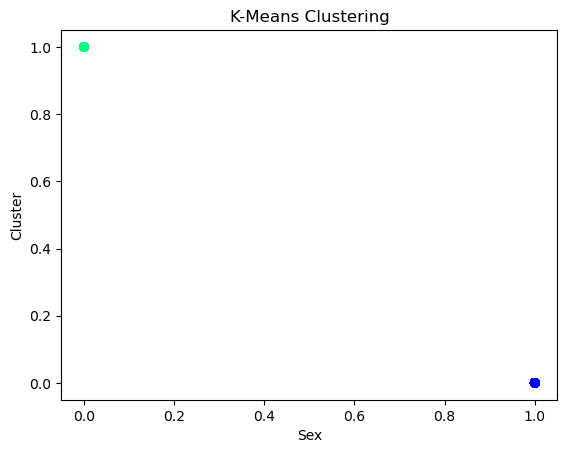

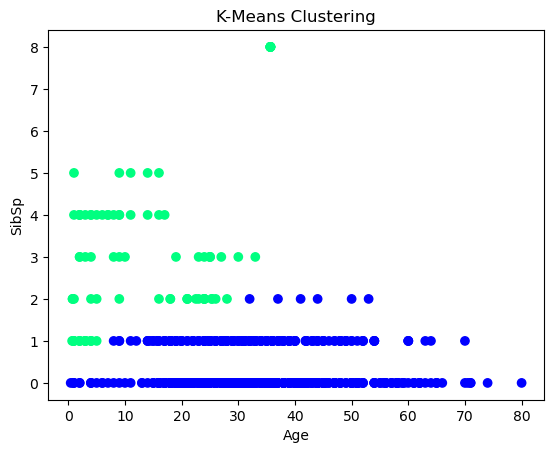

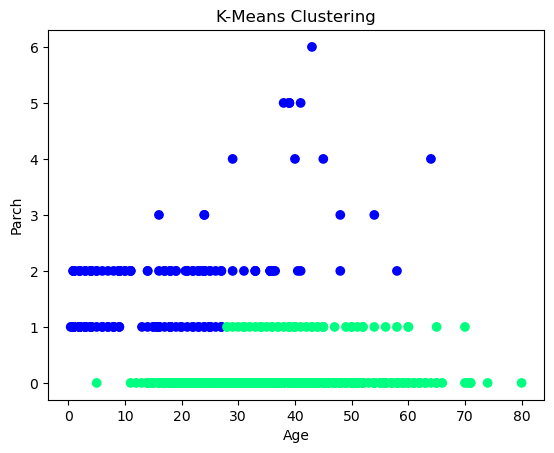

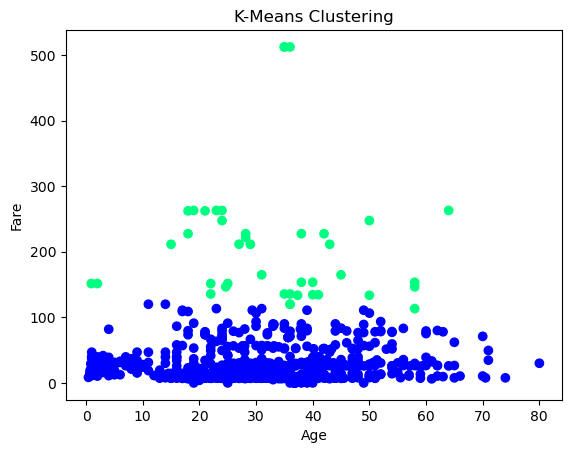

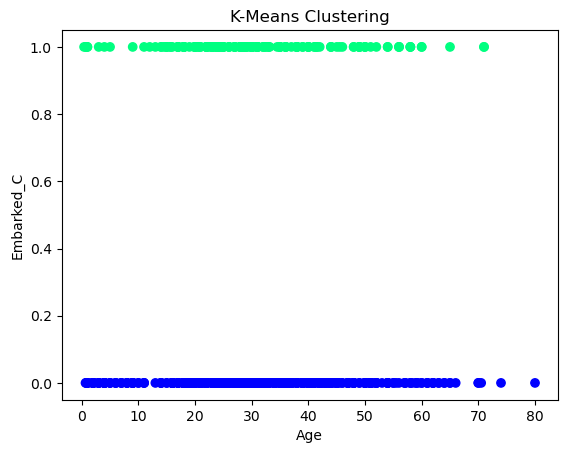

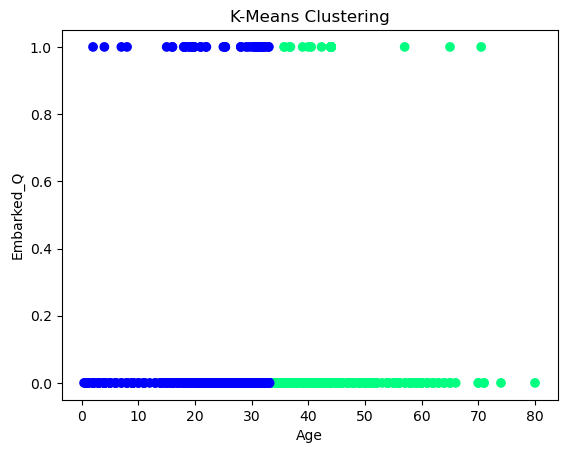

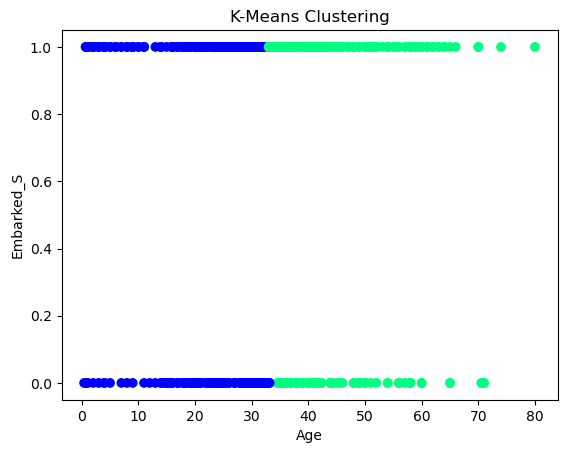

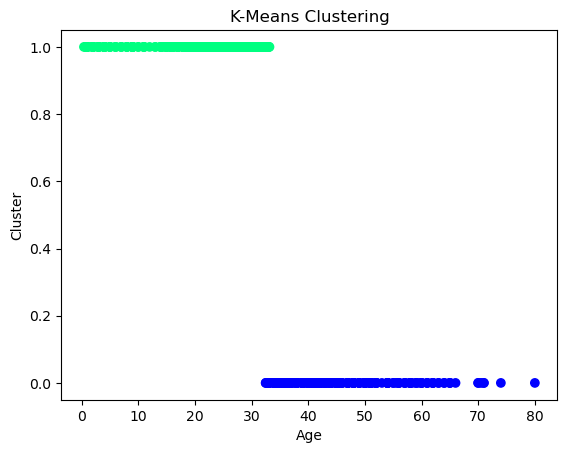

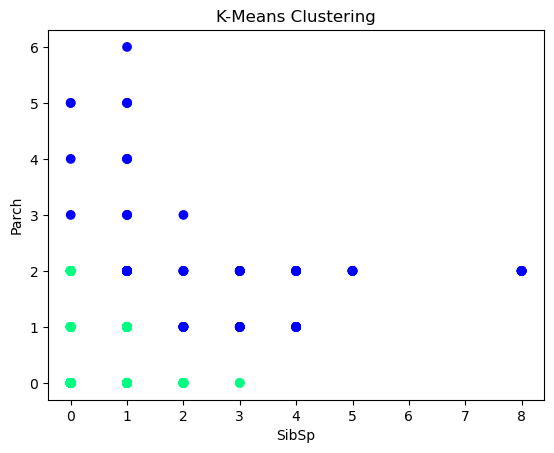

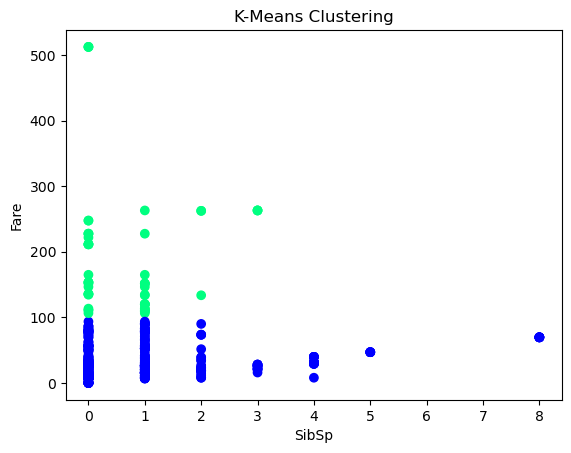

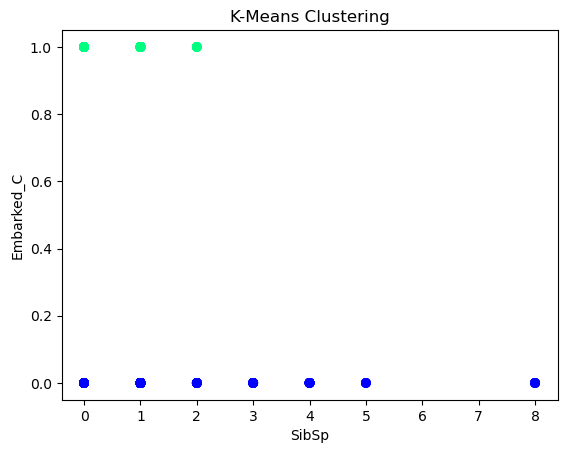

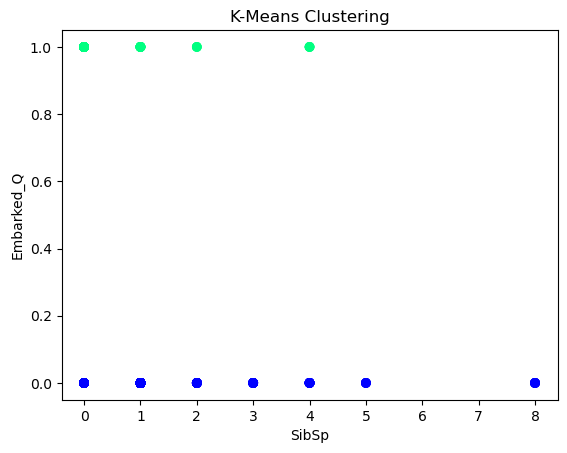

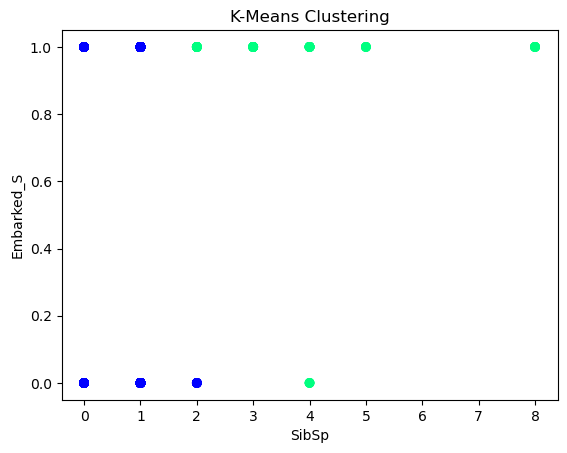

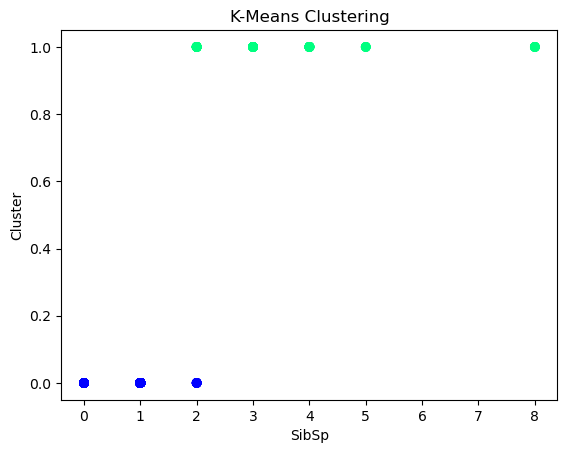

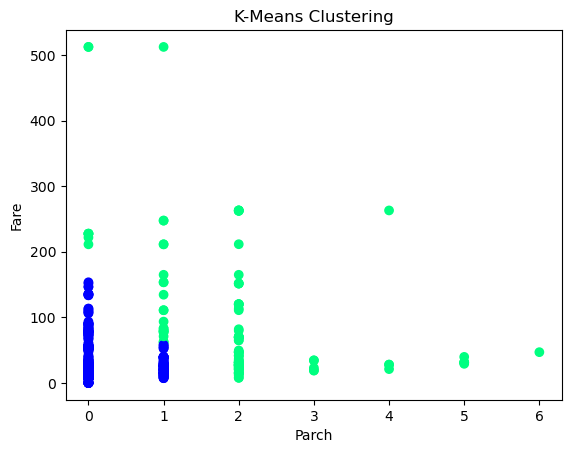

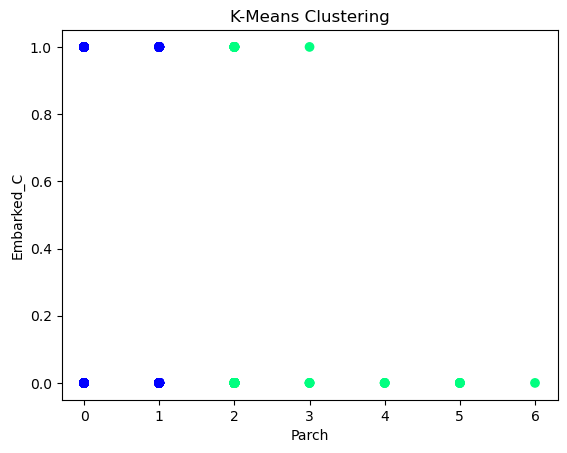

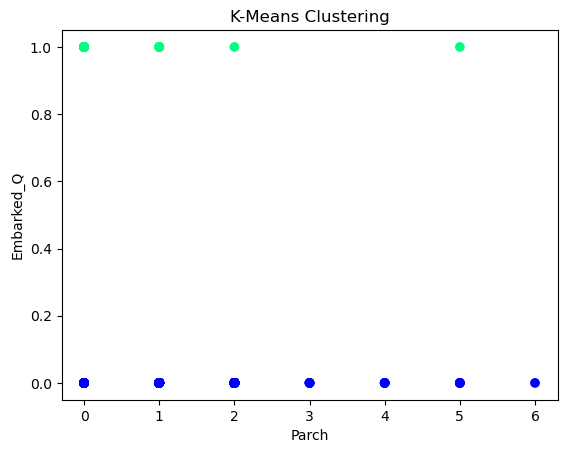

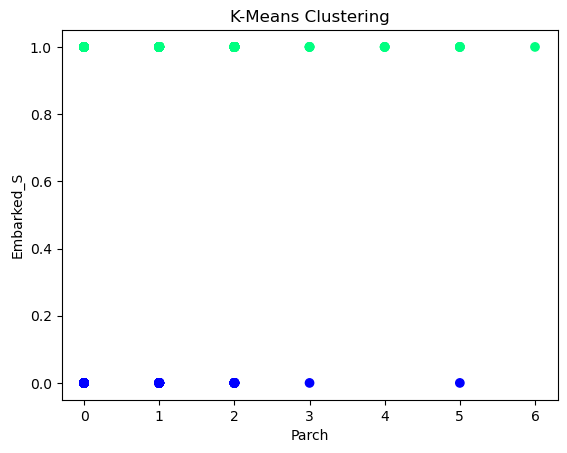

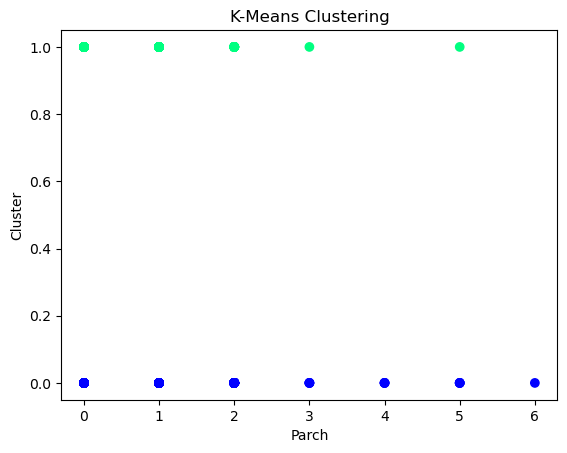

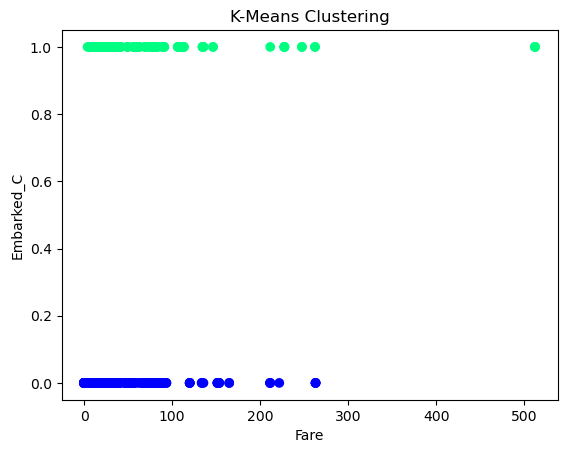

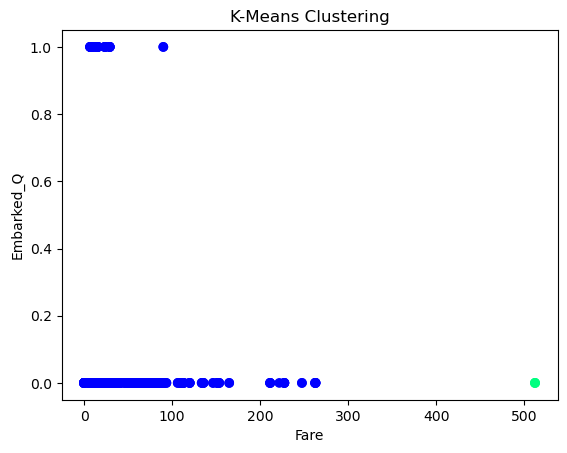

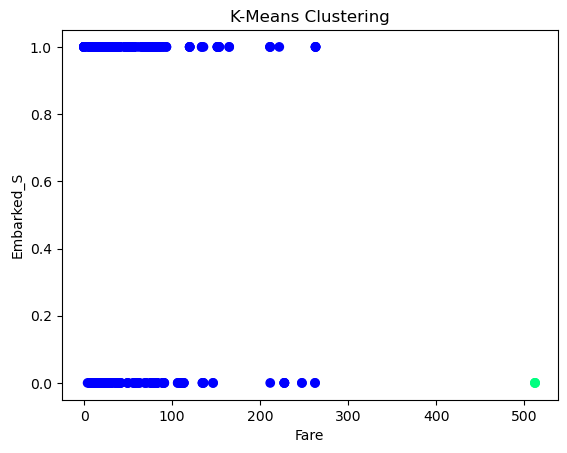

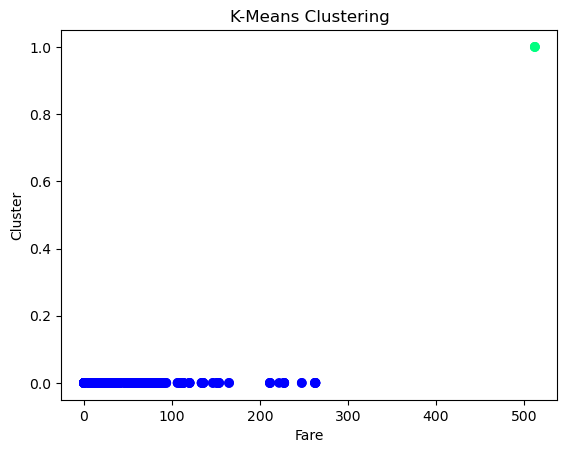

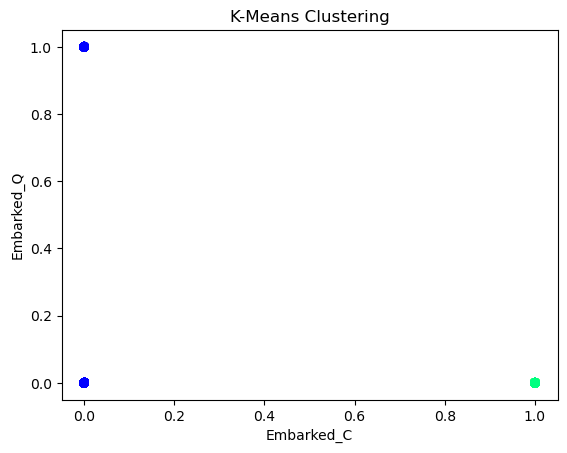

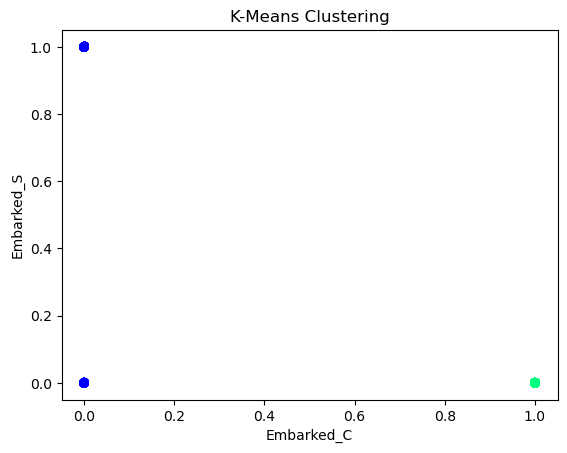

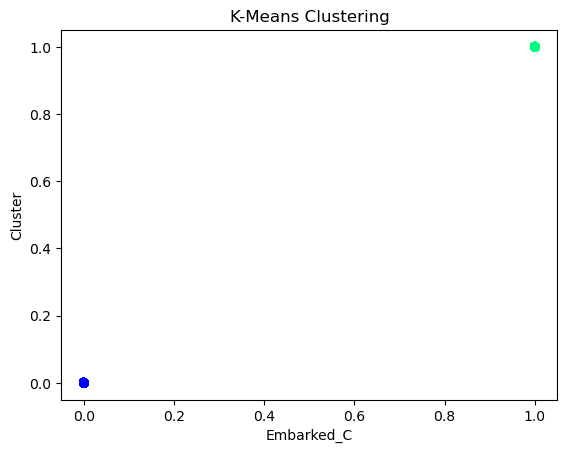

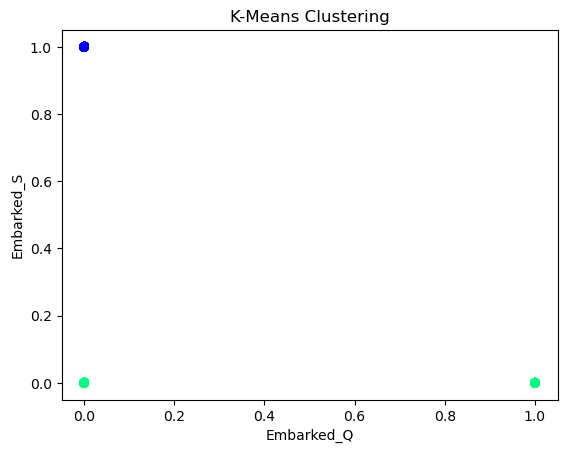

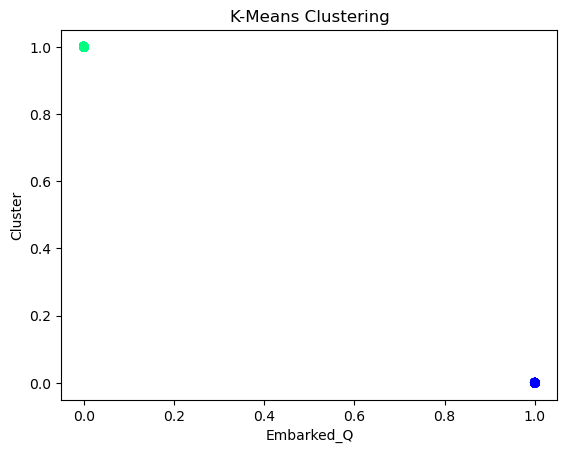

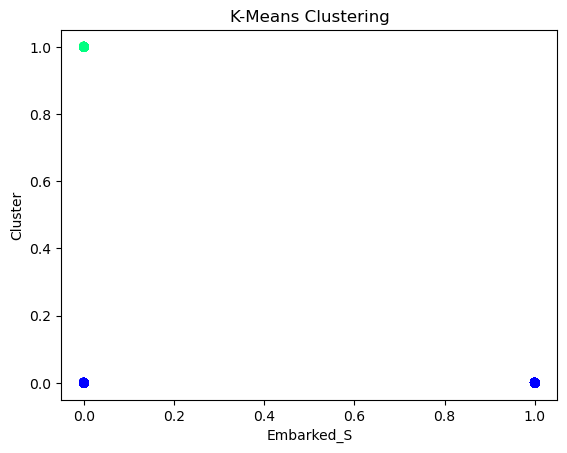

In [107]:
import itertools

for i, j in itertools.combinations(train_df.columns, 2):
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(train_df[[i, j]])
        scaled_df = pd.DataFrame(scaled_features)

        kmeans = KMeans(n_clusters = 2)
        kmeans.fit(scaled_df)

        train_df['Cluster'] = kmeans.labels_

        plt.scatter(train_df[i], train_df[j], c=train_df['Cluster'], cmap='winter')
        plt.xlabel(i)
        plt.ylabel(j)
        plt.title('K-Means Clustering')
        plt.show()